

```
# This is formatted as code
```

# Pediatric Health Conditions Analysis

Analysis of ["Health conditions among children under 18 years"](https://www.kaggle.com/datasets/cdc/health-conditions-among-children-under-18-years/data) dataset from CDC.

## Data Preparation

In [1]:
from google.colab import files

In [11]:
# 🔐 Upload your kaggle.json file manually
# You can get it from: https://www.kaggle.com/accoun
# files.upload()

In [6]:
# Make the folder and move kaggle.json into it
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set proper permissions

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cdc/health-conditions-among-children-under-18-years")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/health-conditions-among-children-under-18-years


In [22]:
import os
os.listdir(path)

['socrata_metadata.json',
 'HUS_child_footnotes_htm',
 'selected-trend-table-from-health-united-states-2011.-health-conditions-among-children-under-18-years-of-age-by-selected-characteristics-united-states-average-annual-selected-years-1997-1999-through-2008-2010.csv']

In [25]:
import pandas as pd

df = pd.read_csv(f"{path}/selected-trend-table-from-health-united-states-2011.-health-conditions-among-children-under-18-years-of-age-by-selected-characteristics-united-states-average-annual-selected-years-1997-1999-through-2008-2010.csv")
df.head()

Question  Question Sort  Characteristic  Characteristic Sort  \
0      Age              1  Under 18 years                    5   
1      Age              1       0-4 years                    1   
2      Age              1      5-17 years                    2   
3      Age              1       5-9 years                    3   
4      Age              1     10-17 years                    4   

   Characteristic Flag           Group  Group flag  1997-1999 1997-1999 flag  \
0                  3.0  Current asthma           1        NaN            NaN   
1                  NaN  Current asthma           1        NaN            NaN   
2                  NaN  Current asthma           1        NaN            NaN   
3                  NaN  Current asthma           1        NaN            NaN   
4                  NaN  Current asthma           1        NaN            NaN   

   1997-1999 SE  ... 2007-2009 SE  2007-2009 SE flag 2008-2010  \
0           NaN  ...          0.2                NaN       9.5   
1           NaN  ...          0.4                NaN       6.2   
2           NaN  ...          0.3                NaN      10.8   
3           NaN  ...          0.4                NaN      10.7   
4           NaN  ...          0.4                NaN      10.9   

   2008-2010 flag 2008-2010 SE  2008-2010 SE flag 2009-2011  2009-2011 flag  \
0             NaN          0.2                NaN       9.5             NaN   
1             NaN          0.3                NaN       6.4             NaN   
2             NaN          0.3                NaN      10.7             NaN   
3             NaN          0.4                NaN      10.2             NaN   
4             NaN          0.3                NaN      11.1             NaN   

  2009-2011 SE  2009-2011 SE flag  
0          0.2                NaN  
1          0.3                NaN  
2          0.2                NaN  
3          0.4                NaN  
4          0.3                NaN  

[5 rows x 35 columns]

In [24]:
df.info()
df.describe(include='all')  # includes categorical stats
df.isnull().sum()           # check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             196 non-null    object 
 1   Question Sort        196 non-null    int64  
 2   Characteristic       196 non-null    object 
 3   Characteristic Sort  196 non-null    int64  
 4   Characteristic Flag  148 non-null    float64
 5   Group                196 non-null    object 
 6   Group flag           196 non-null    int64  
 7   1997-1999            135 non-null    float64
 8   1997-1999 flag       5 non-null      object 
 9   1997-1999 SE         135 non-null    float64
 10  1997-1999 SE flag    5 non-null      object 
 11  2000-2002            140 non-null    float64
 12  2000-2002 flag       12 non-null     object 
 13  2000-2002 SE         140 non-null    float64
 14  2000-2002 SE flag    12 non-null     object 
 15  2003-2005            186 non-null    flo

Question                 0
Question Sort            0
Characteristic           0
Characteristic Sort      0
Characteristic Flag     48
Group                    0
Group flag               0
1997-1999               61
1997-1999 flag         191
1997-1999 SE            61
1997-1999 SE flag      191
2000-2002               56
2000-2002 flag         184
2000-2002 SE            56
2000-2002 SE flag      184
2003-2005               10
2003-2005 flag         181
2003-2005 SE            10
2003-2005 SE flag      181
2006-2008               12
2006-2008 flag         179
2006-2008 SE            12
2006-2008 SE flag      179
2007-2009               11
2007-2009 flag         178
2007-2009 SE            11
2007-2009 SE flag      178
2008-2010               10
2008-2010 flag         179
2008-2010 SE            10
2008-2010 SE flag      179
2009-2011                9
2009-2011 flag         180
2009-2011 SE             9
2009-2011 SE flag      180
dtype: int64

In [26]:
df['Question'].unique()

array(['Age', 'Sex', 'Race', 'Hispanic origin and race',
       'Percent of poverty level',
       'Health insurance status at the time of interview'], dtype=object)

In [27]:
df['Group'].unique()

array(['Current asthma', 'Attention deficit hyperactivity disorder',
       'Food allergy', 'Asthma attack in the past 12 months',
       'Hay fever or respiratory allergy', 'Skin allergy',
       'Serious emotional or behavioral difficulties',
       'Three or more ear infections'], dtype=object)

In [39]:
id_vars = ['Group', 'Characteristic', 'Question']
year_cols = [col for col in df.columns if '-' in col and 'SE' not in col and 'flag' not in col]
df_long = df.melt(id_vars=id_vars, value_vars=year_cols,
                  var_name='Period', value_name='Prevalence')
df_long.head()

Group  Characteristic Question     Period  Prevalence
0  Current asthma  Under 18 years      Age  1997-1999         NaN
1  Current asthma       0-4 years      Age  1997-1999         NaN
2  Current asthma      5-17 years      Age  1997-1999         NaN
3  Current asthma       5-9 years      Age  1997-1999         NaN
4  Current asthma     10-17 years      Age  1997-1999         NaN

In [40]:
df[year_cols].isna().sum()

1997-1999    61
2000-2002    56
2003-2005    10
2006-2008    12
2007-2009    11
2008-2010    10
2009-2011     9
dtype: int64

In [41]:
df_long = df.melt(id_vars=['Group', 'Characteristic', 'Question'],
                  value_vars=year_cols,
                  var_name='Period', value_name='Prevalence')

print(df_long.head(10))  # See first few rows
print(df_long['Prevalence'].isna().mean())  # % of missing data
print(df_long['Period'].unique())  # Periods included

            Group                         Characteristic Question     Period  \
0  Current asthma                         Under 18 years      Age  1997-1999   
1  Current asthma                              0-4 years      Age  1997-1999   
2  Current asthma                             5-17 years      Age  1997-1999   
3  Current asthma                              5-9 years      Age  1997-1999   
4  Current asthma                            10-17 years      Age  1997-1999   
5  Current asthma                                   Male      Sex  1997-1999   
6  Current asthma                                 Female      Sex  1997-1999   
7  Current asthma                             White only     Race  1997-1999   
8  Current asthma         Black or African American only     Race  1997-1999   
9  Current asthma  American Indian or Alaska Native only     Race  1997-1999   

   Prevalence  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6      

## Data Exploration

In [43]:
df_long.groupby(['Group', 'Question'])['Prevalence'].apply(lambda x: x.notna().mean())

Group                                         Question                                        
Asthma attack in the past 12 months           Age                                                 1.000000
                                              Health insurance status at the time of interview    1.000000
                                              Hispanic origin and race                            1.000000
                                              Percent of poverty level                            1.000000
                                              Race                                                0.738095
                                              Sex                                                 1.000000
Attention deficit hyperactivity disorder      Age                                                 1.000000
                                              Health insurance status at the time of interview    1.000000
                                              Hispanic origin and race                            1.000000
                                              Percent of poverty level                            1.000000
                                              Race                                                0.714286
                                              Sex                                                 1.000000
Current asthma                                Age                                                 0.714286
                                              Health insurance status at the time of interview    0.714286
                                              Hispanic origin and race                            0.714286
                                              Percent of poverty level                            0.714286
                                              Race                                                0.595238
                                              Sex                                                 0.714286
Food allergy                                  Age                                                 1.000000
                                              Health insurance status at the time of interview    1.000000
                                              Hispanic origin and race                            1.000000
                                              Percent of poverty level                            1.000000
                                              Race                                                0.761905
                                              Sex                                                 1.000000
Hay fever or respiratory allergy              Age                                                 1.000000
                                              Health insurance status at the time of interview    1.000000
                                              Hispanic origin and race                            1.000000
                                              Percent of poverty level                            1.000000
                                              Race                                                0.809524
                                              Sex                                                 1.000000
Serious emotional or behavioral difficulties  Age                                                 0.714286
                                              Health insurance status at the time of interview    0.714286
                                              Hispanic origin and race                            0.714286
                                              Percent of poverty level                            0.714286
                                              Race                                                0.500000
                                              Sex                                                 0.714286
Skin allergy                                  Age    

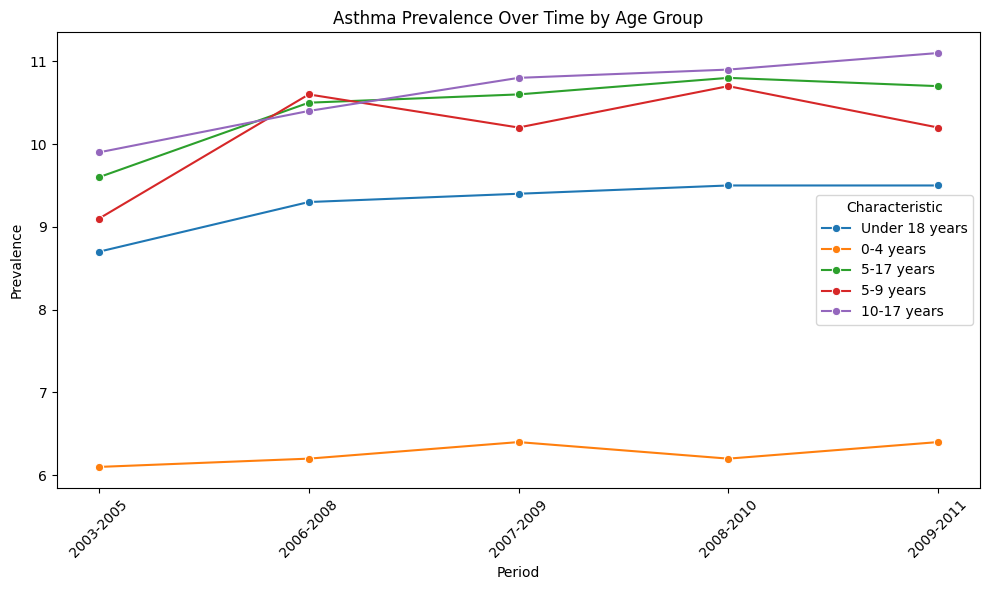

In [44]:
asthma_age = df_long[
    (df_long['Group'] == 'Current asthma') &
    (df_long['Question'] == 'Age')
]

plt.figure(figsize=(10,6))
sns.lineplot(data=asthma_age, x='Period', y='Prevalence', hue='Characteristic', marker='o')
plt.title("Asthma Prevalence Over Time by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Let's automate this whole thing.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_prevalence_over_time(df_long, condition, question):
    subset = df_long[
        (df_long['Group'] == condition) &
        (df_long['Question'] == question)
    ].copy()

    if subset.empty:
        print(f"No data found for {condition} and {question}")
        return

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=subset, x='Period', y='Prevalence', hue='Characteristic', marker='o')
    plt.title(f"{condition} Prevalence Over Time by {question}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [56]:
conditions = df_long['Group'].unique()
questions = df_long['Question'].unique()
conditions, questions

(array(['Current asthma', 'Attention deficit hyperactivity disorder',
        'Food allergy', 'Asthma attack in the past 12 months',
        'Hay fever or respiratory allergy', 'Skin allergy',
        'Serious emotional or behavioral difficulties',
        'Three or more ear infections'], dtype=object),
 array(['Age', 'Sex', 'Race', 'Hispanic origin and race',
        'Percent of poverty level',
        'Health insurance status at the time of interview'], dtype=object))

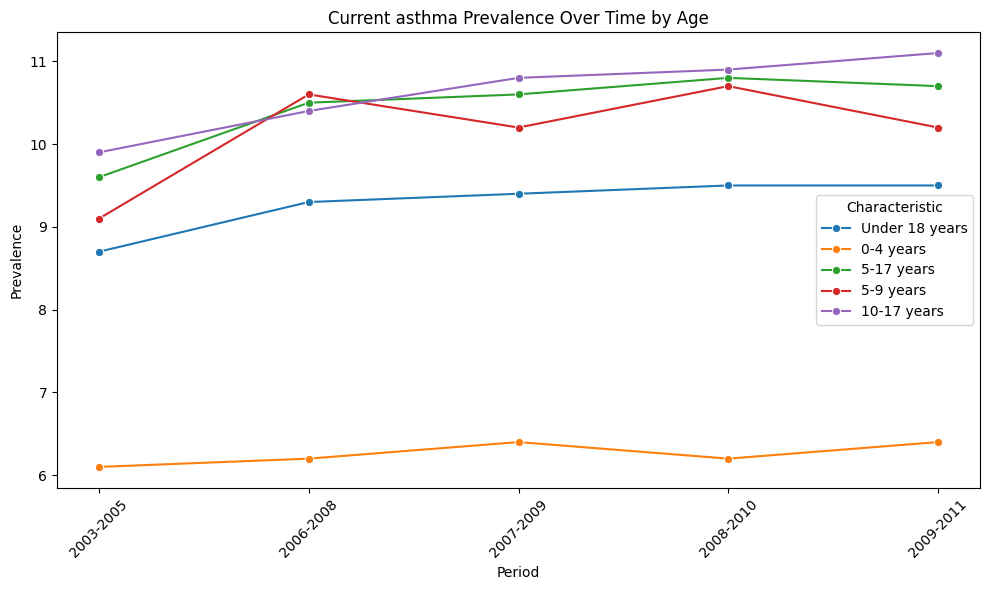

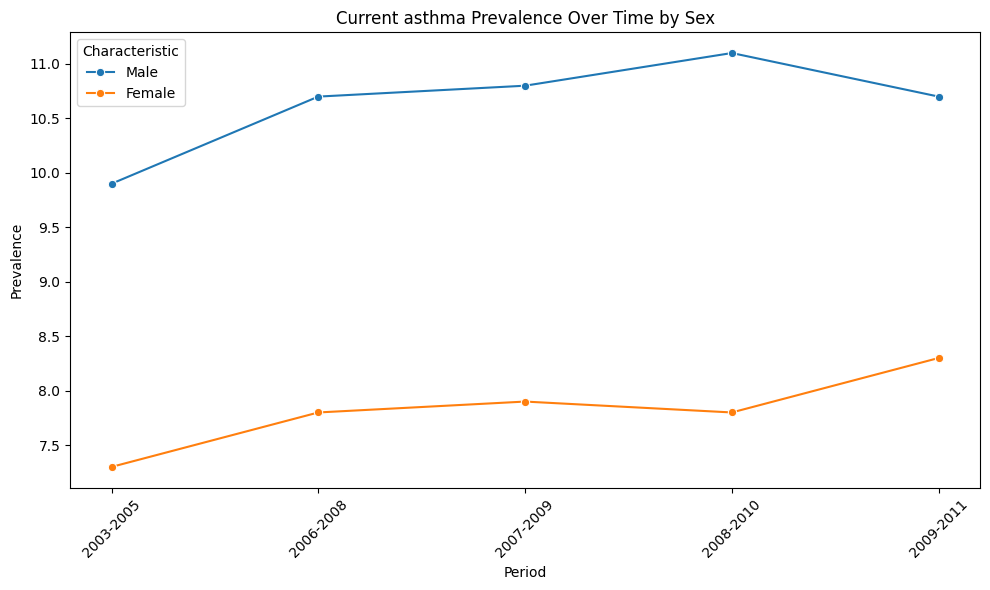

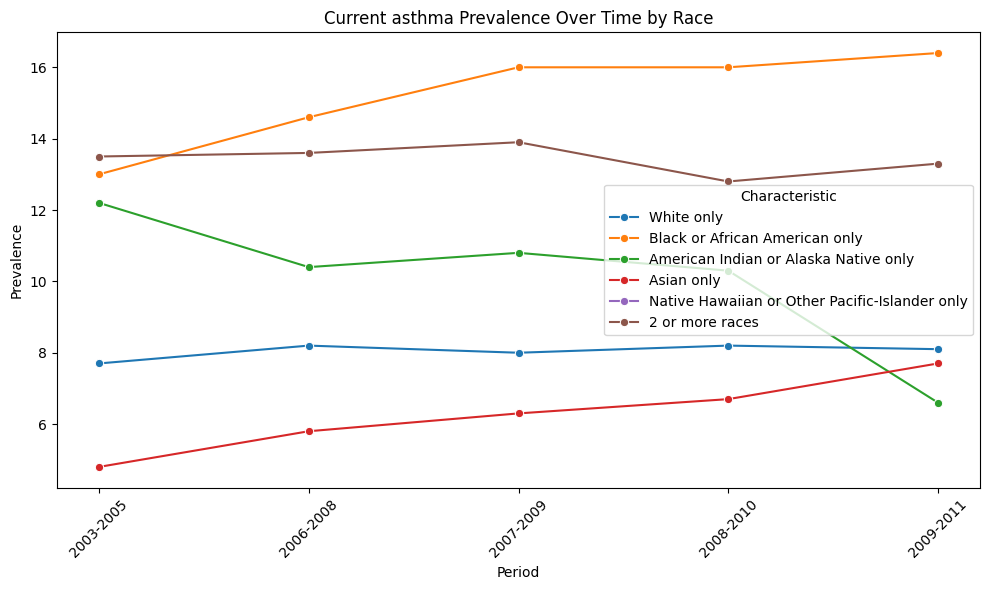

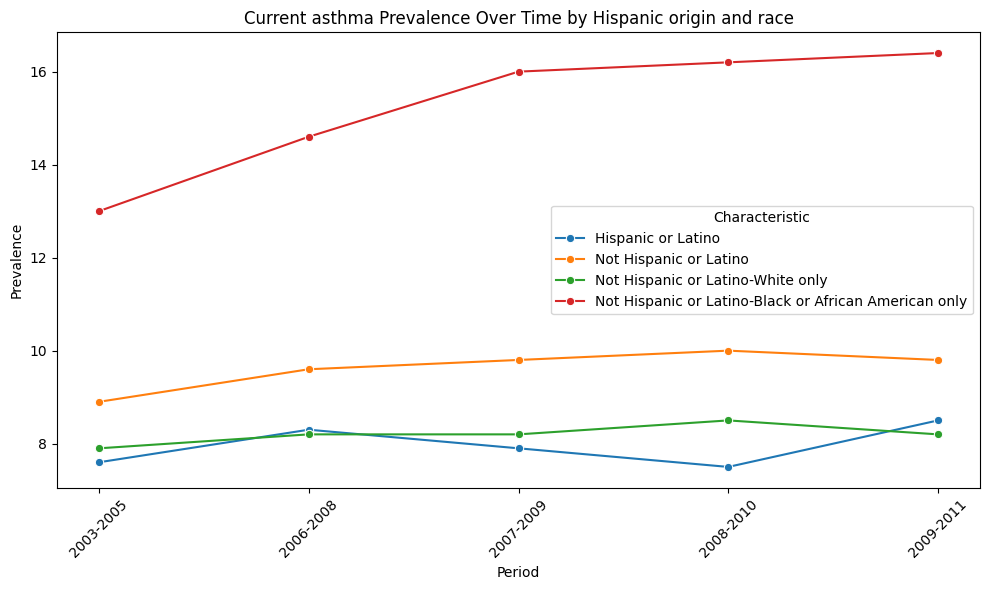

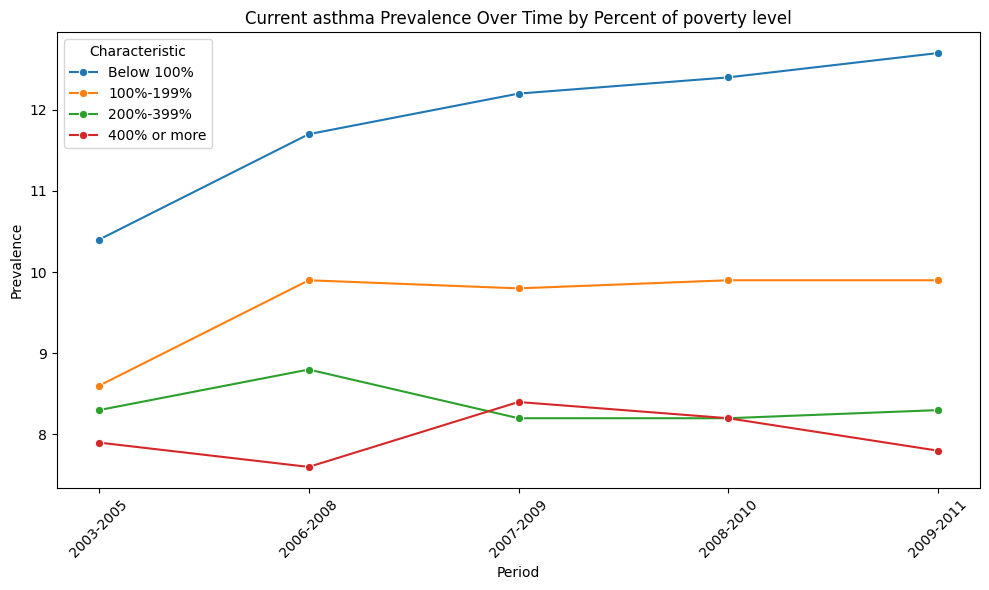

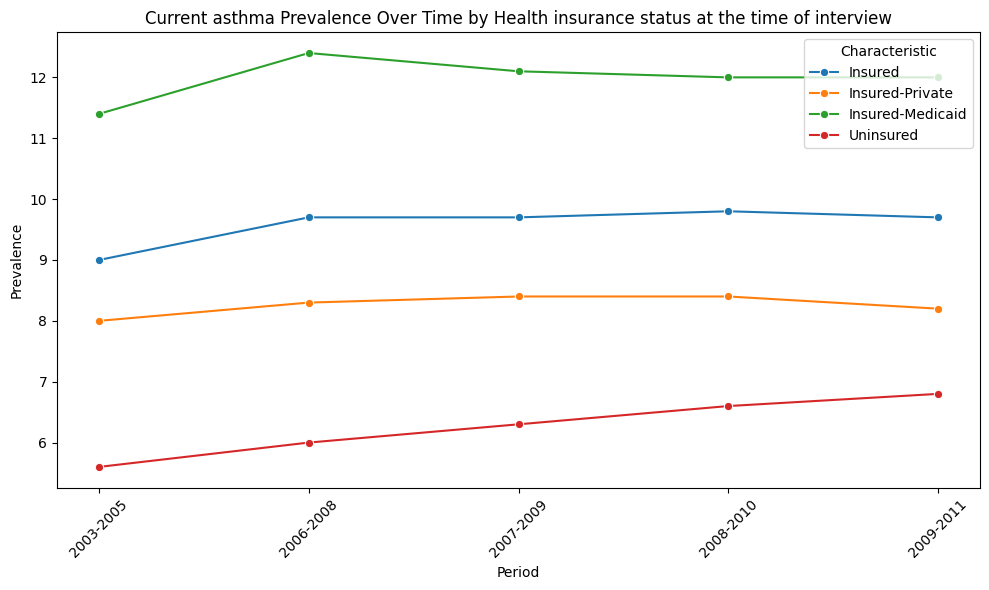

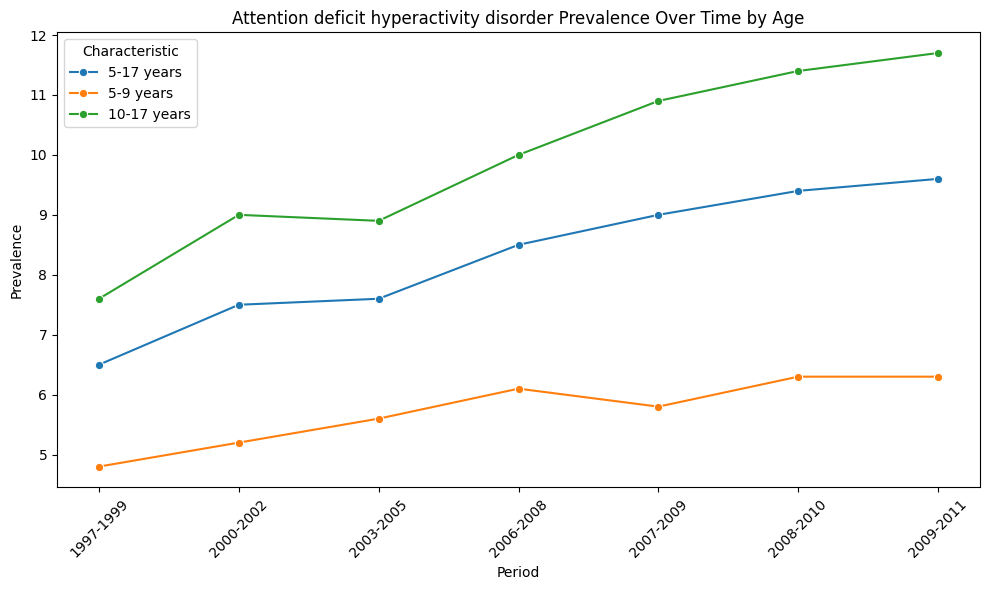

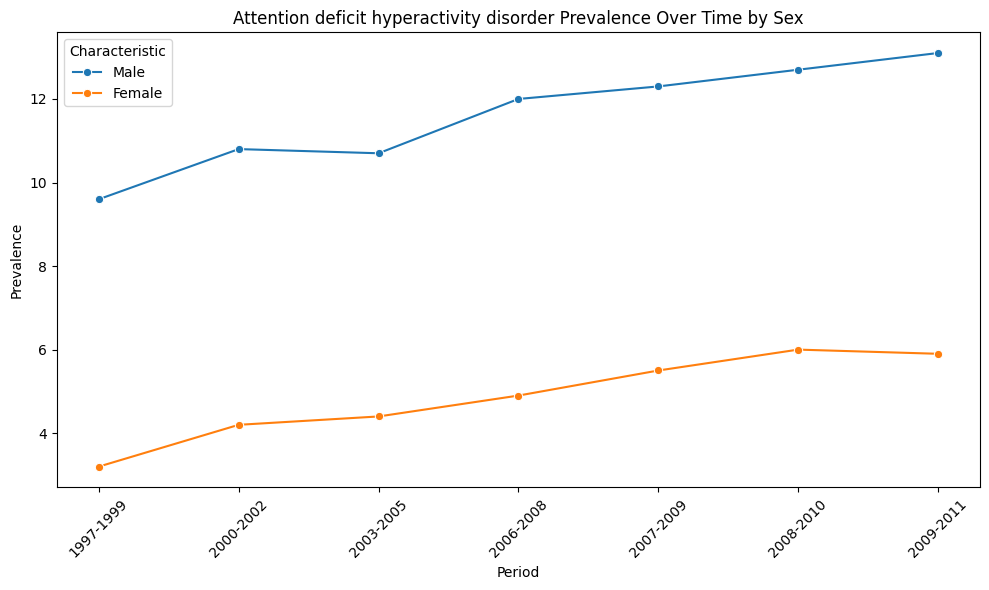

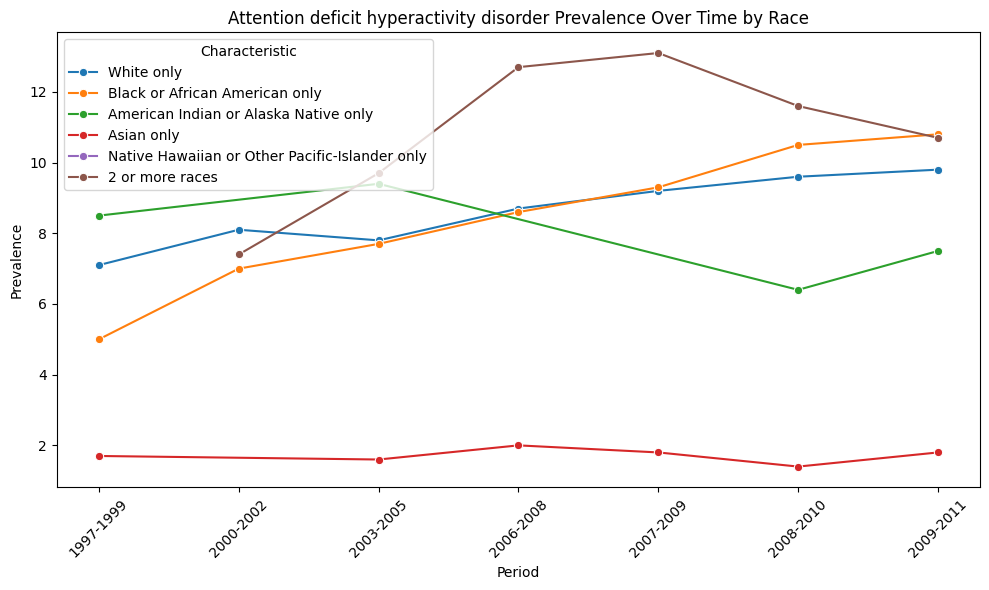

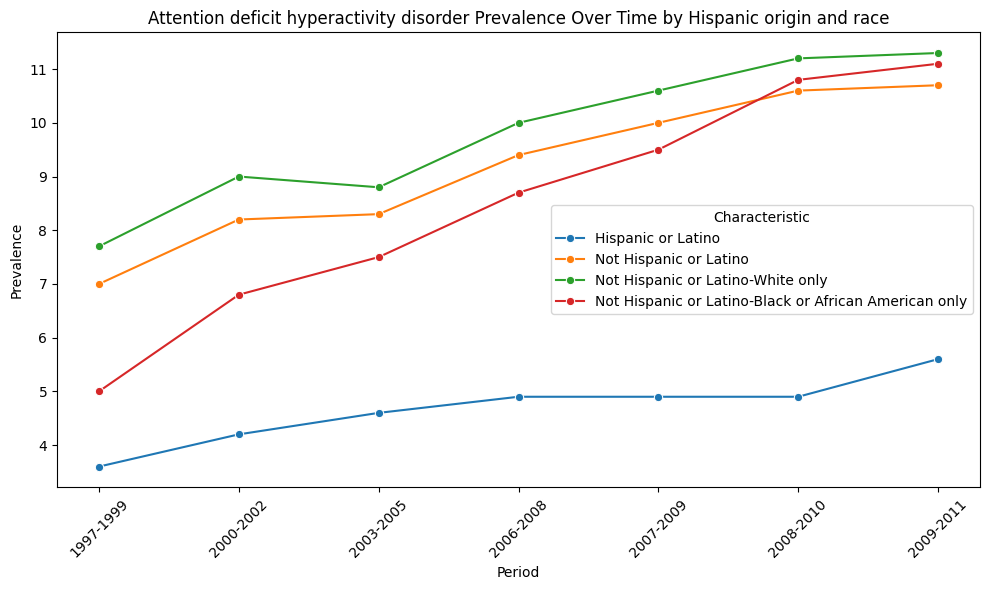

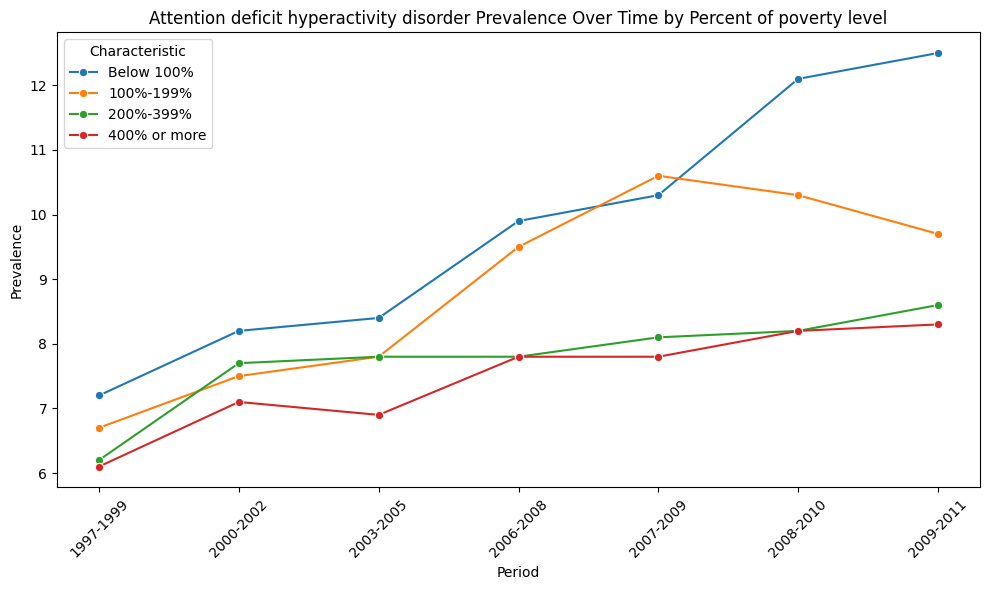

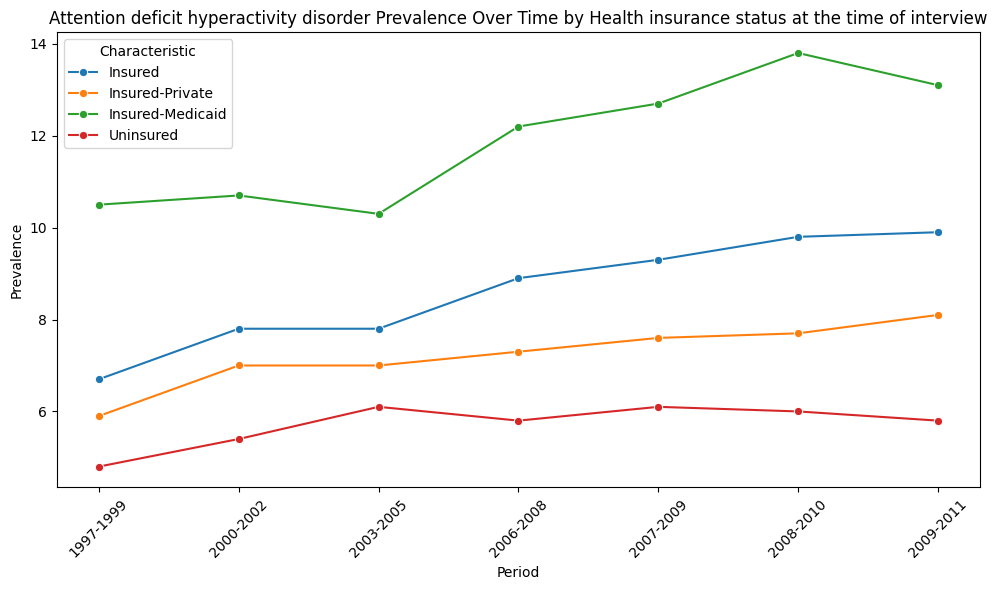

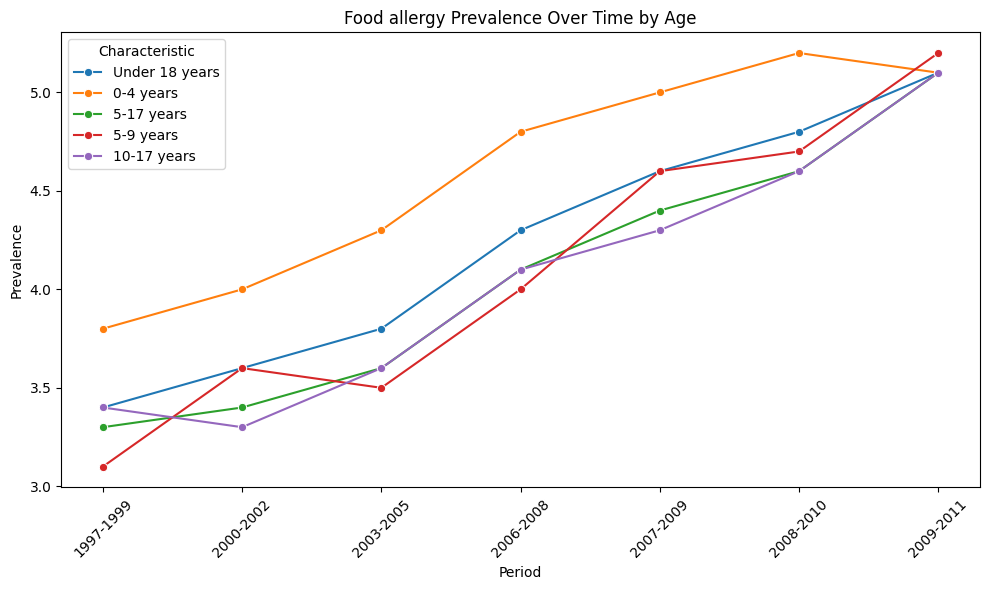

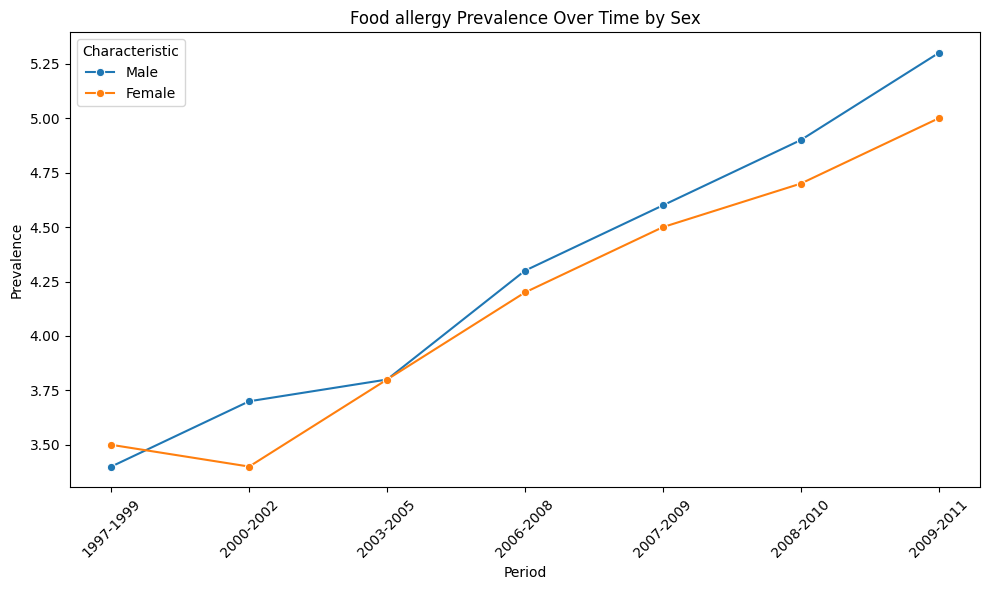

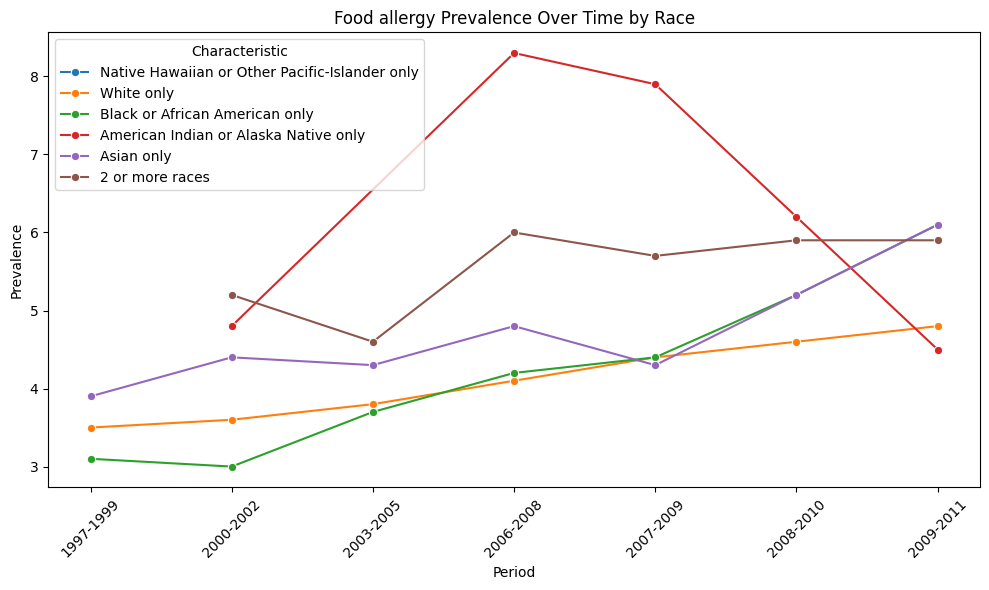

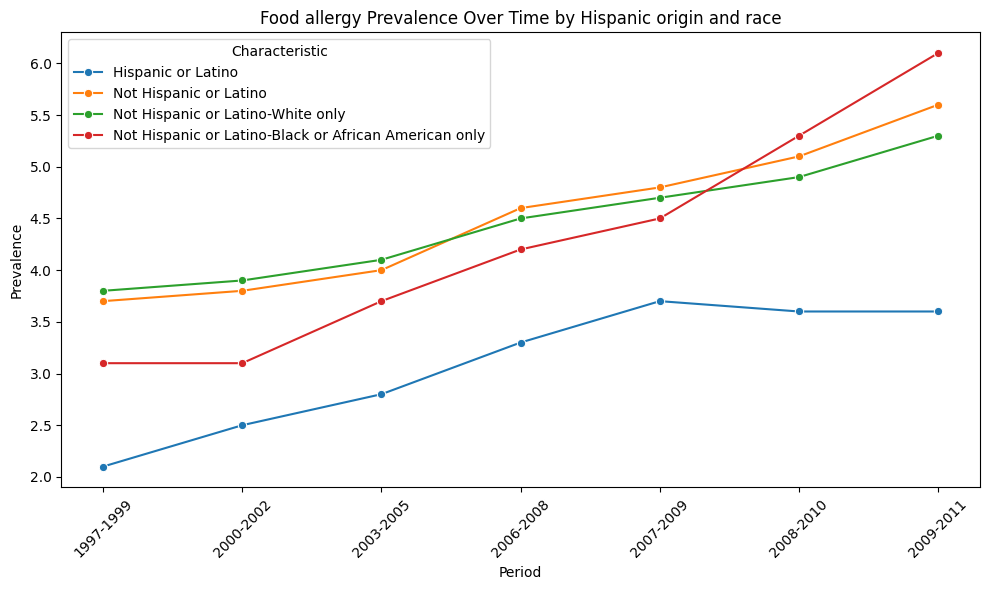

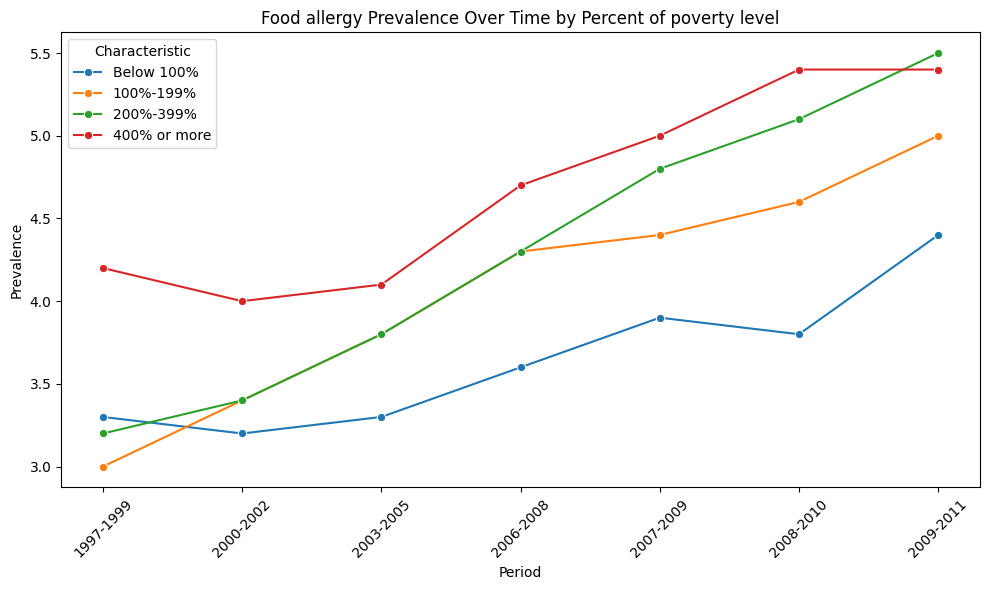

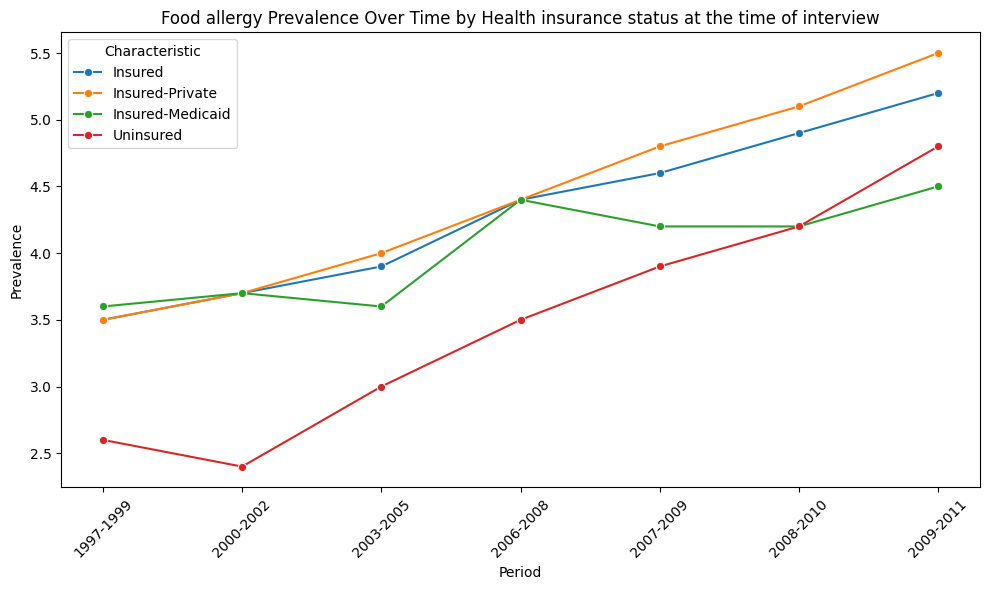

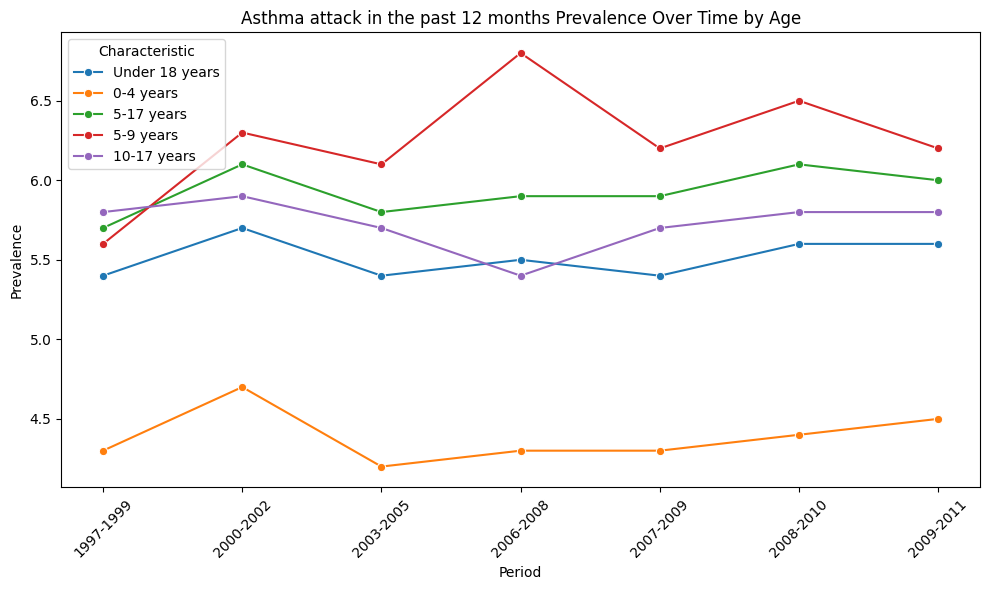

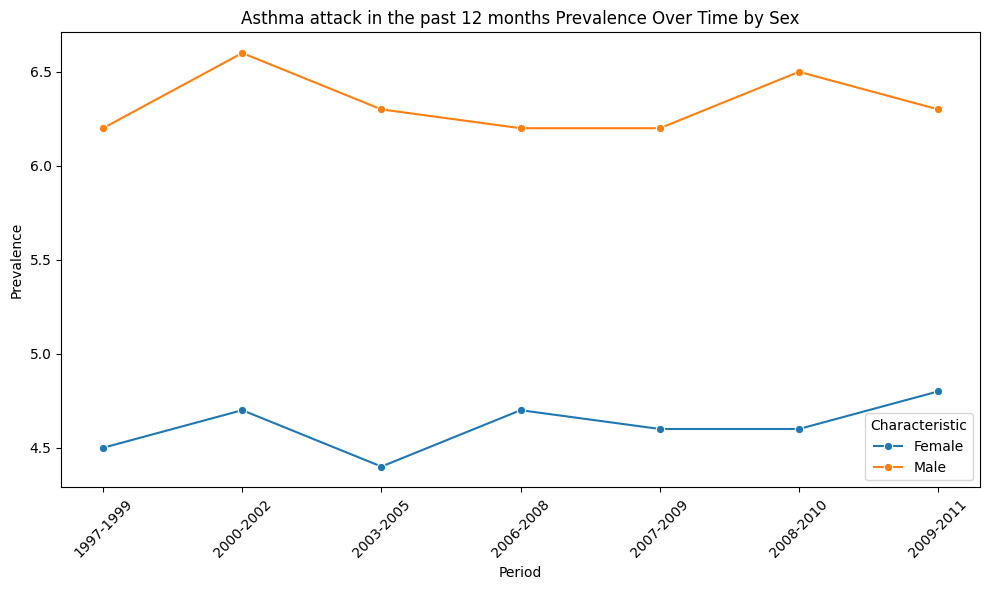

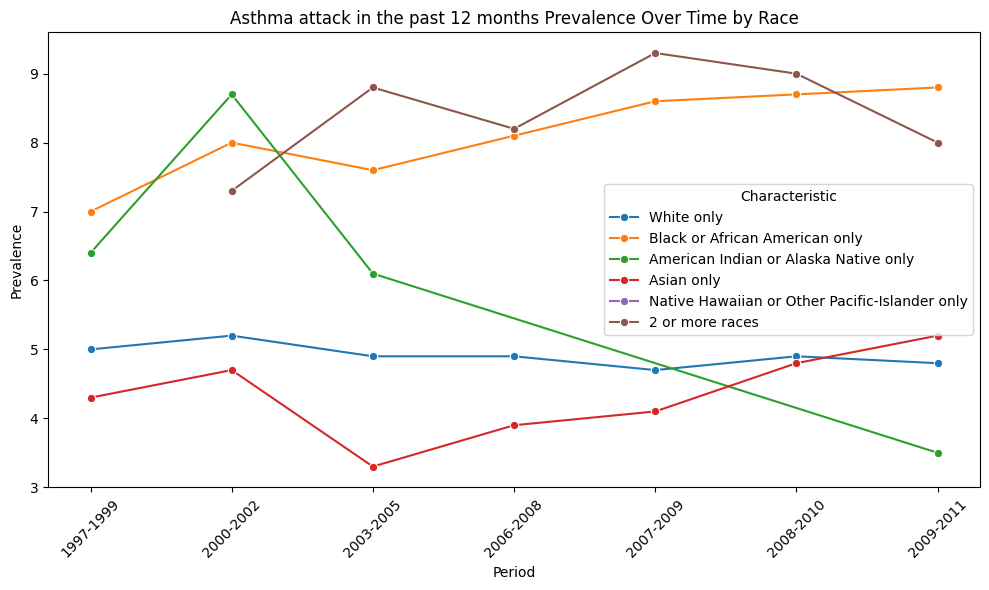

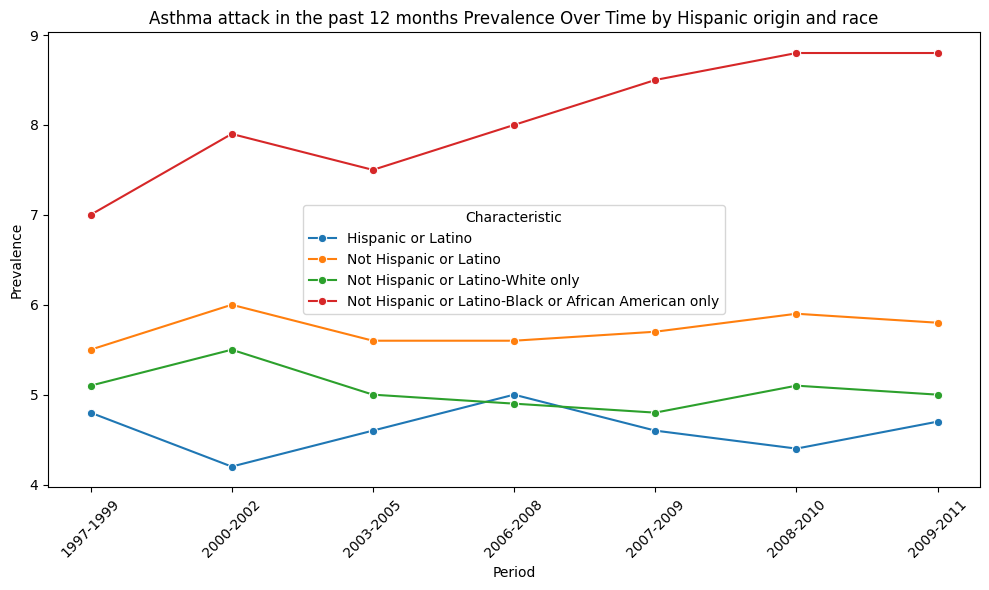

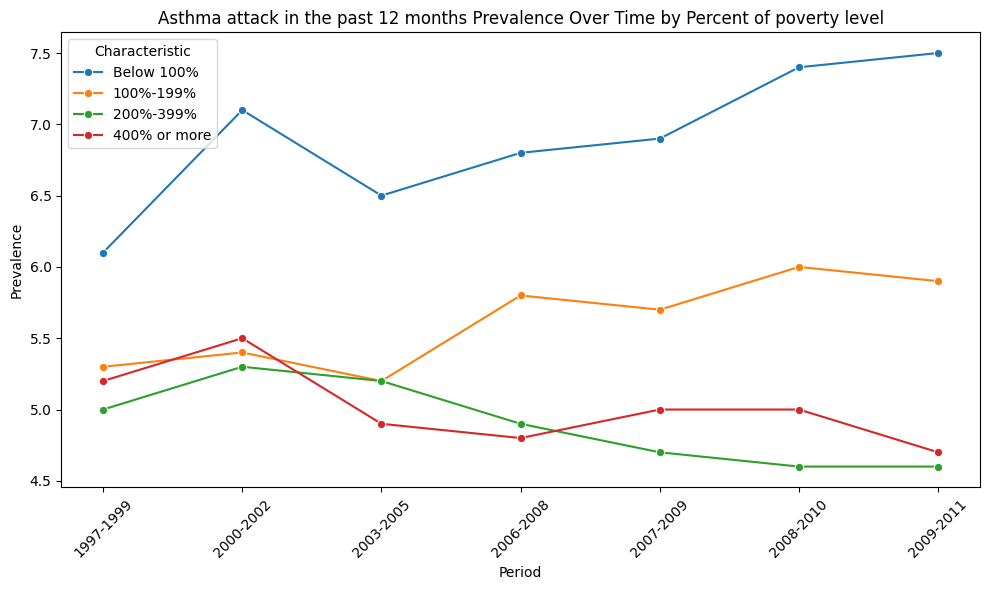

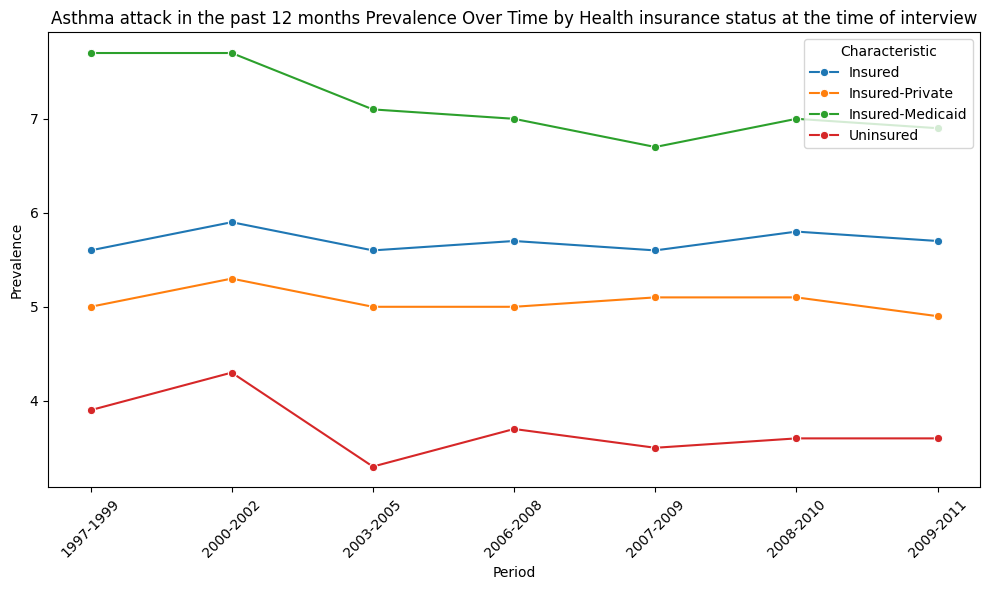

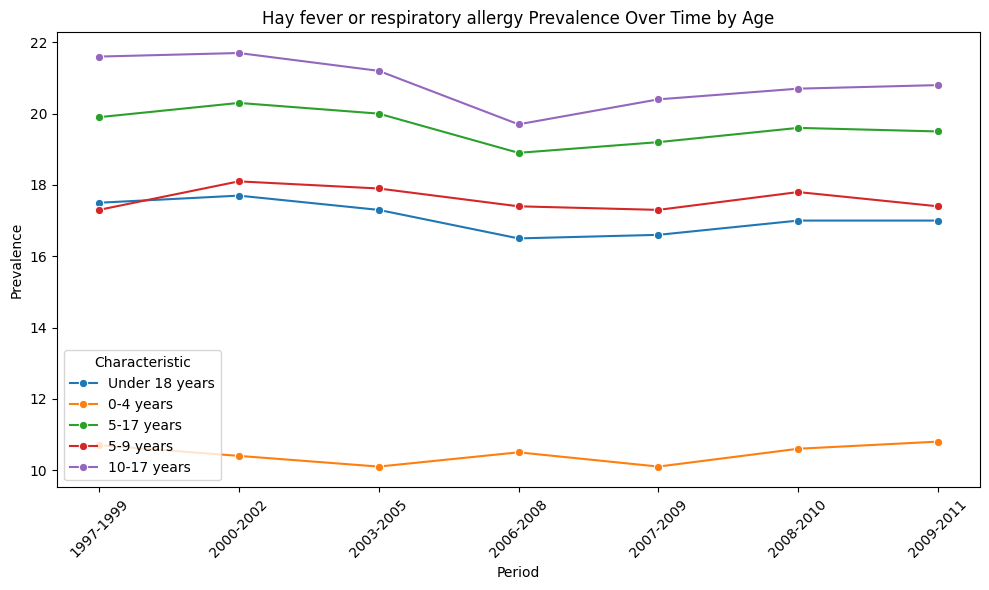

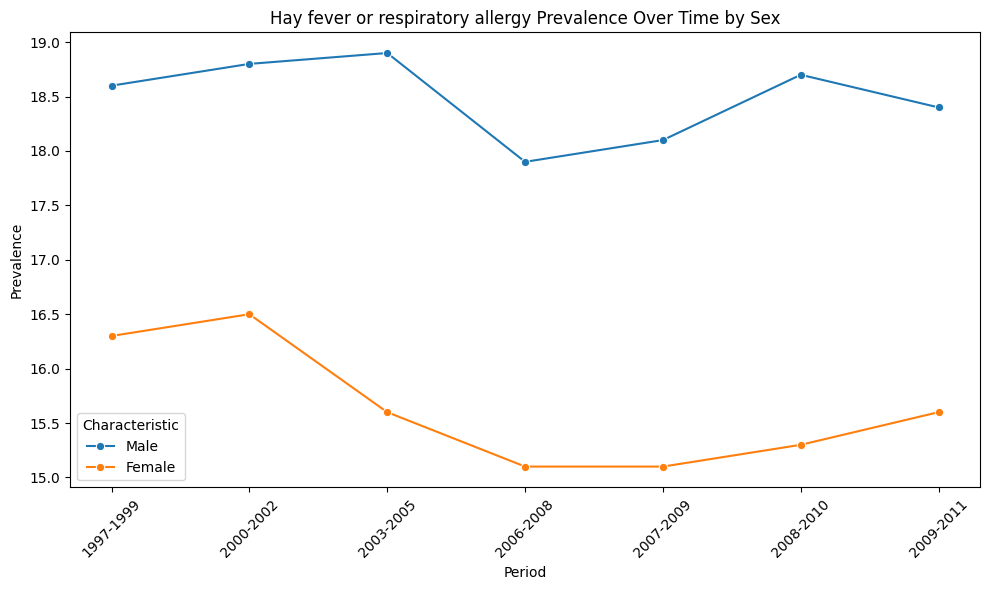

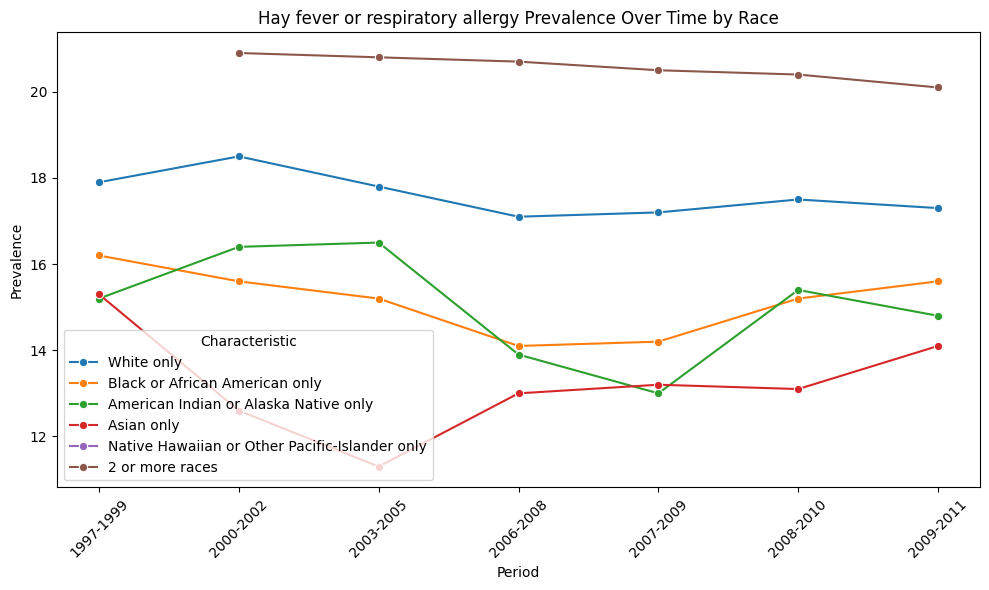

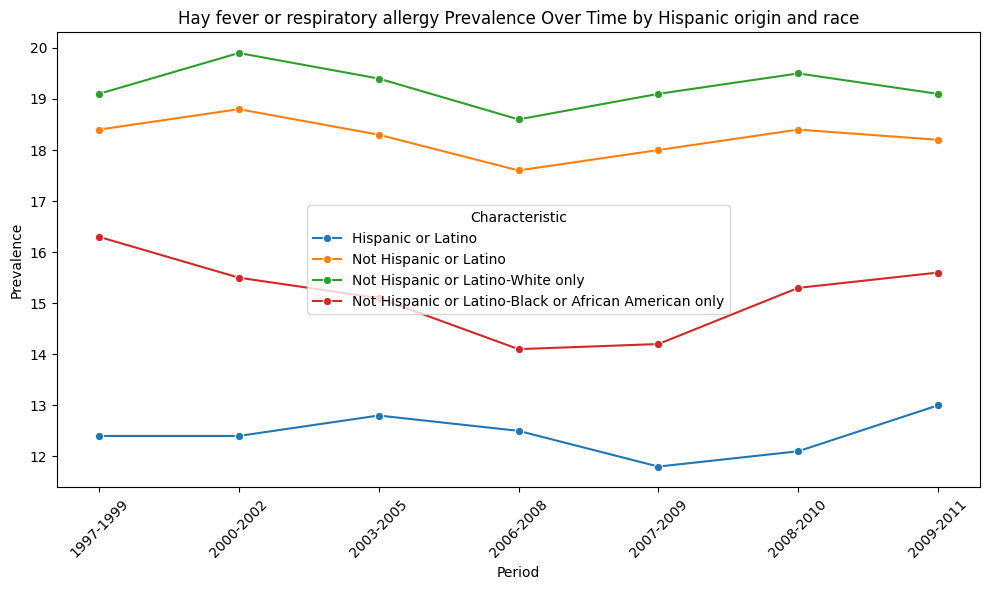

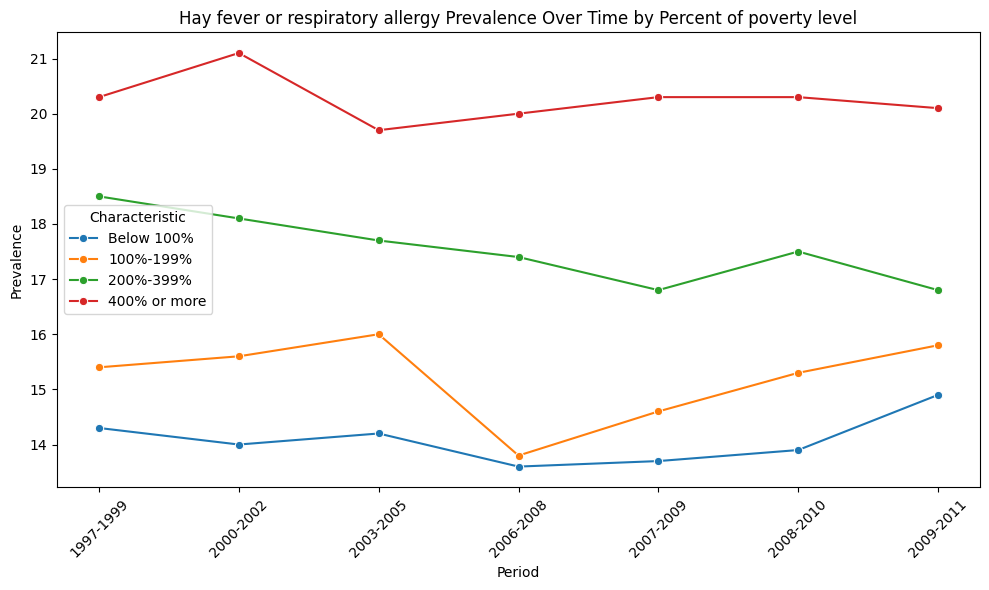

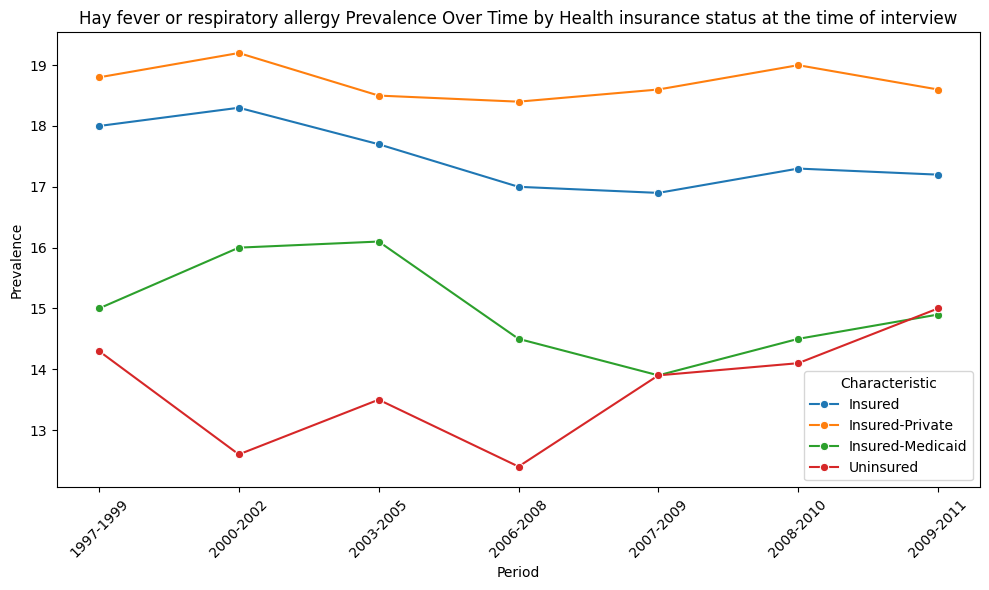

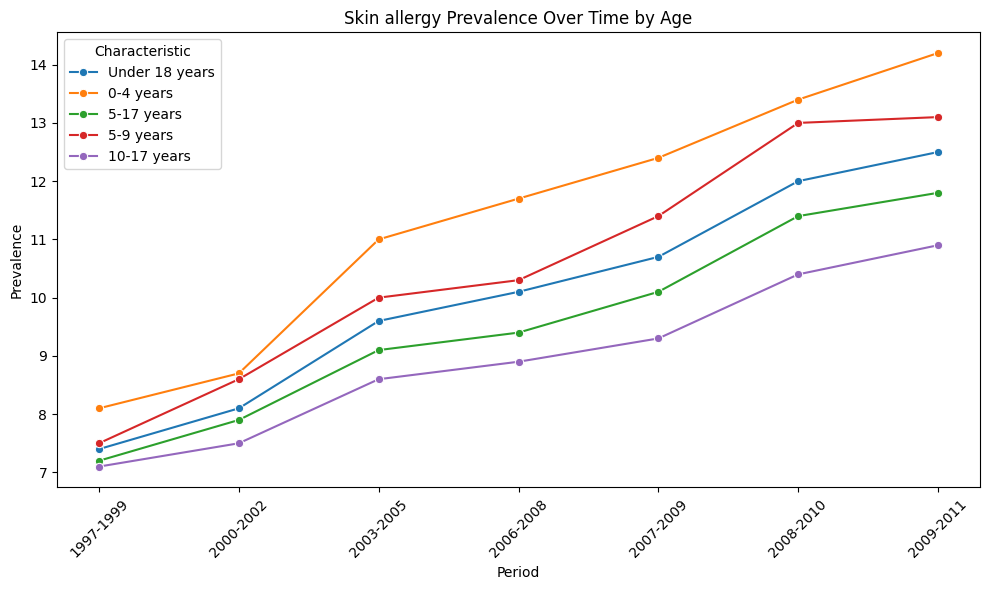

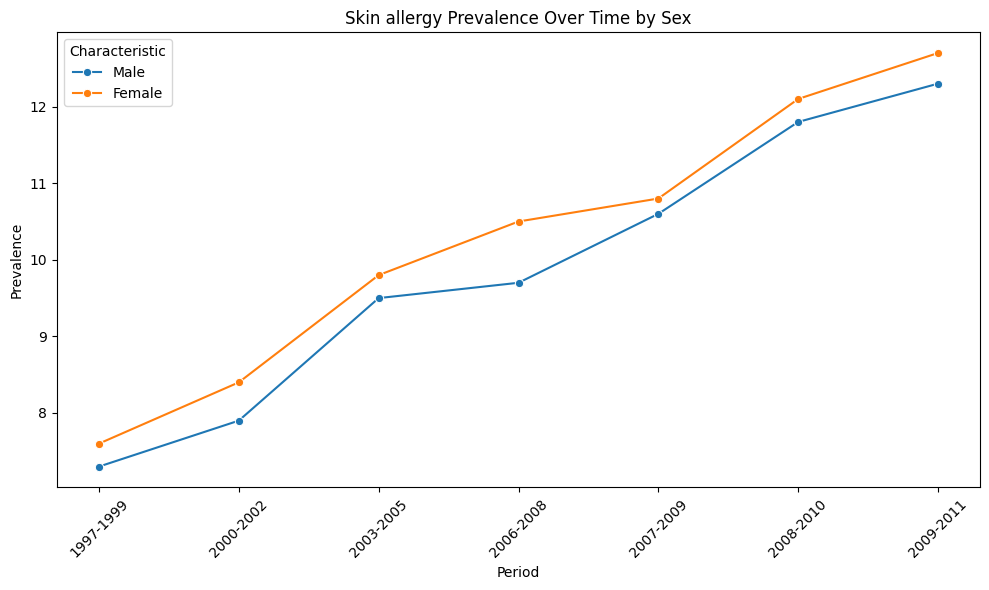

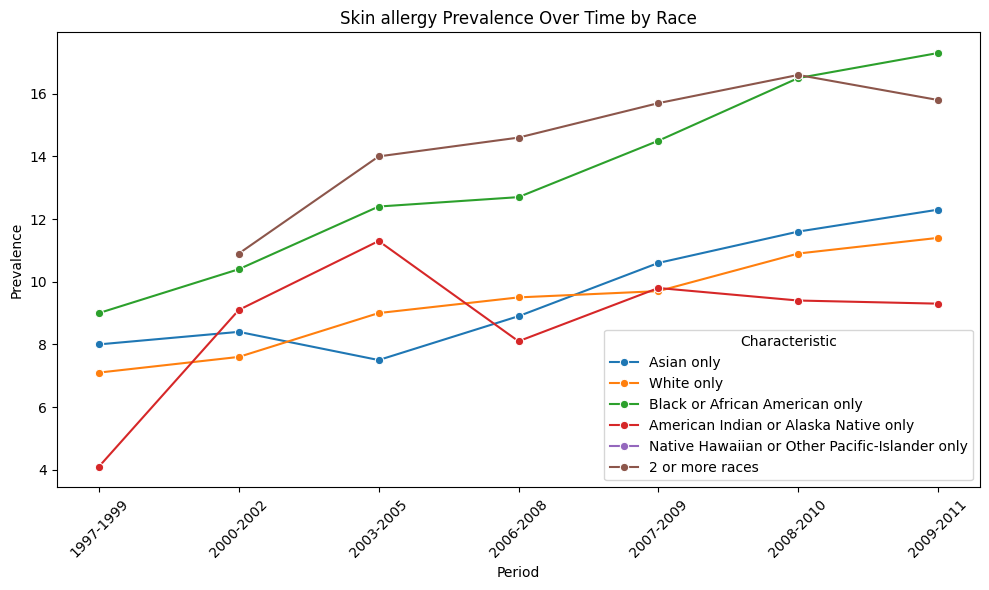

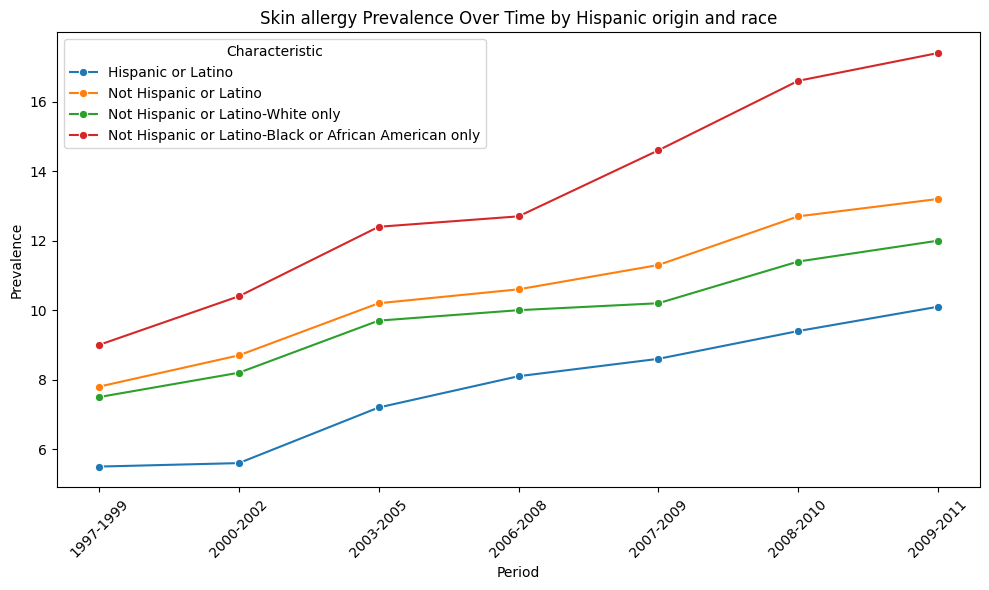

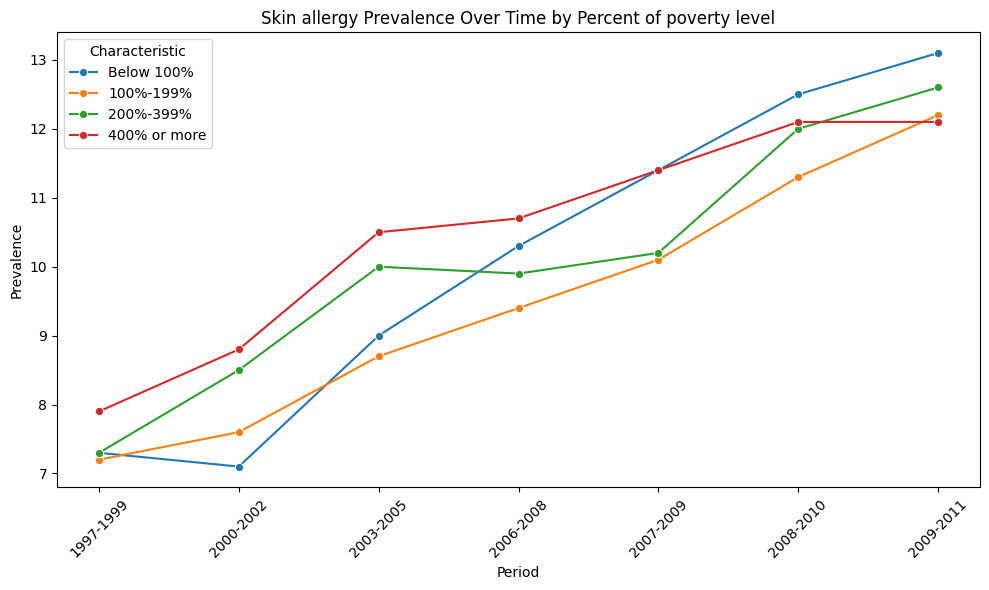

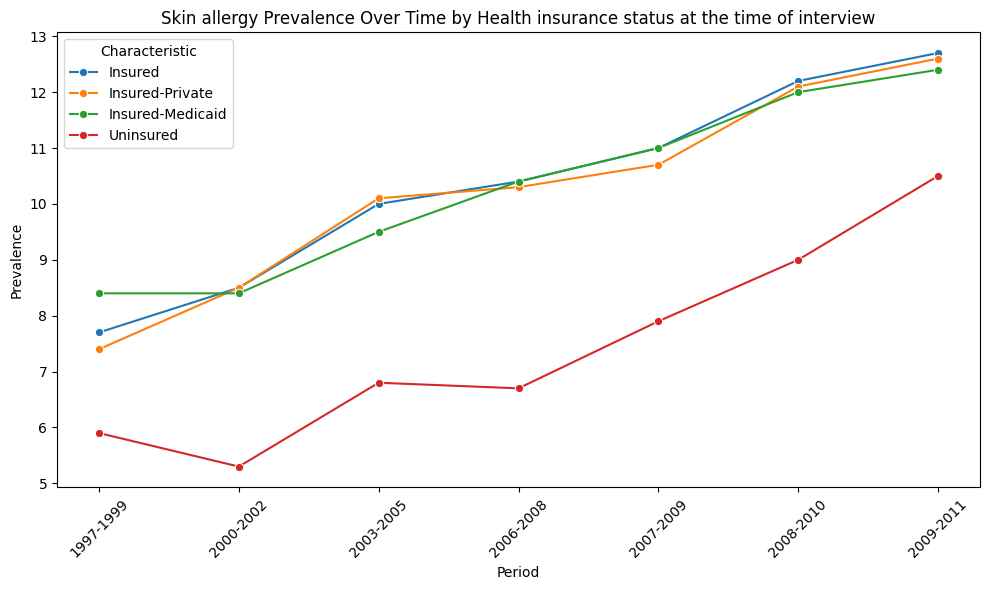

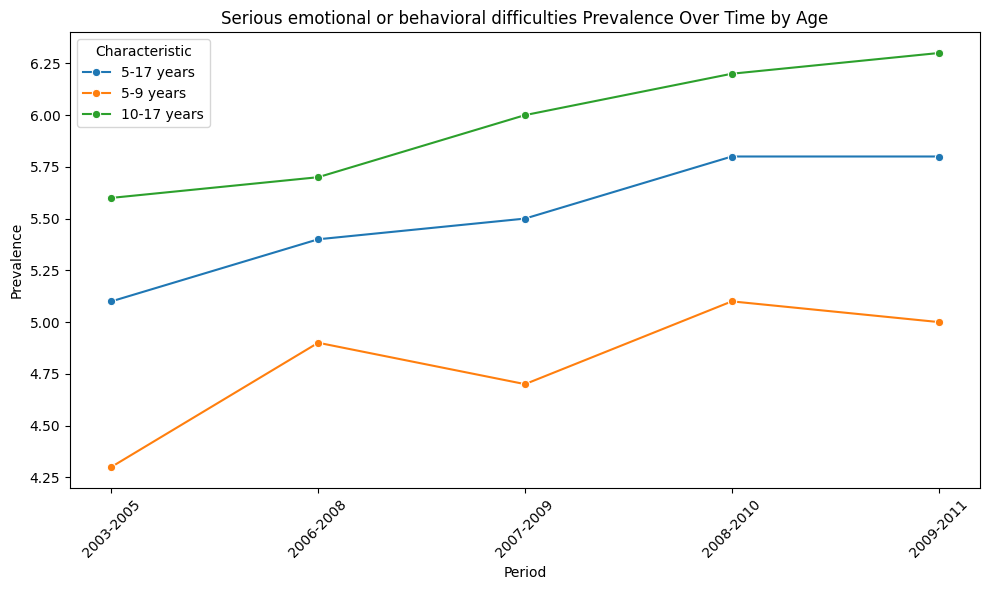

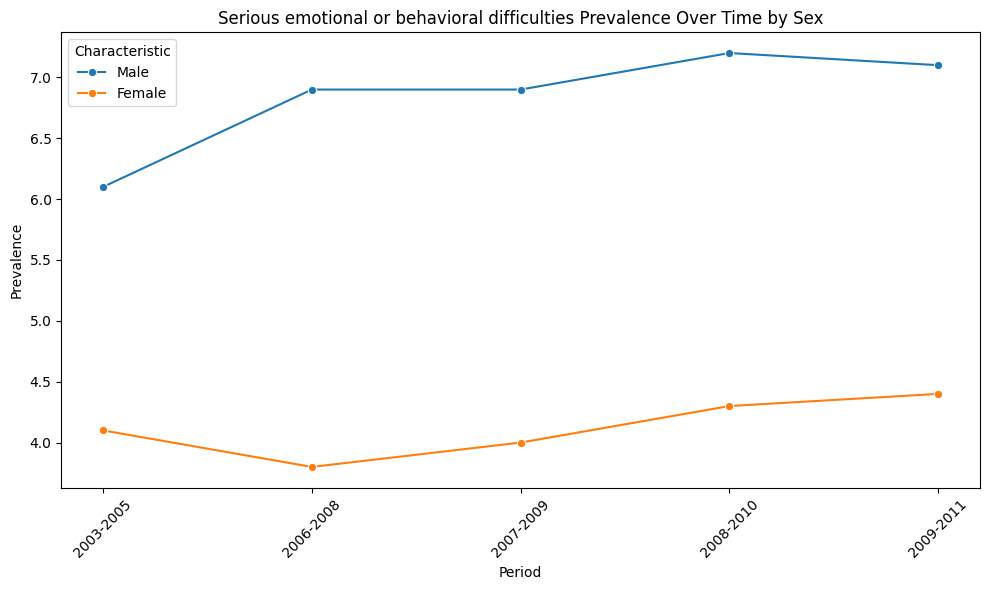

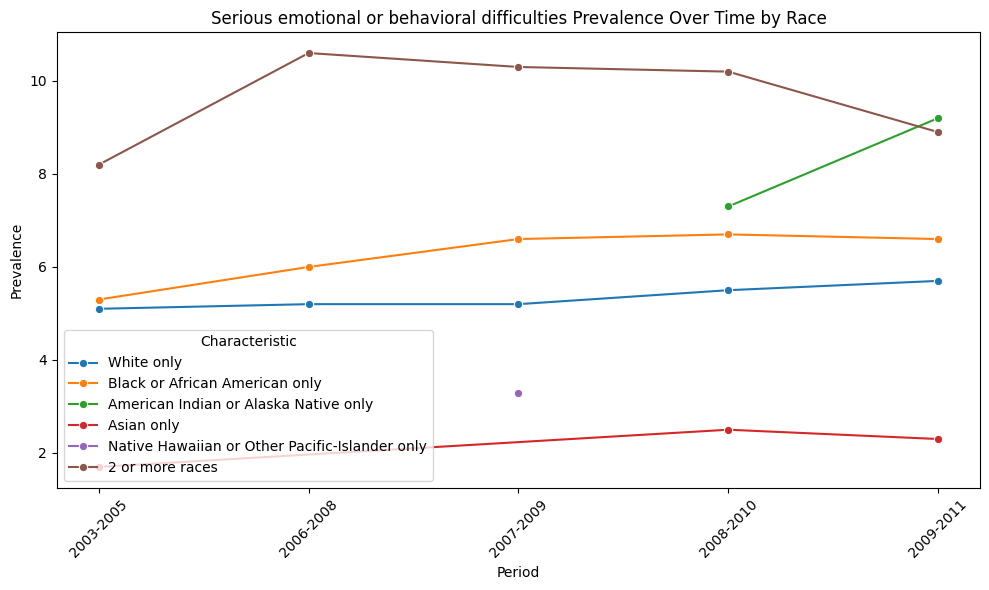

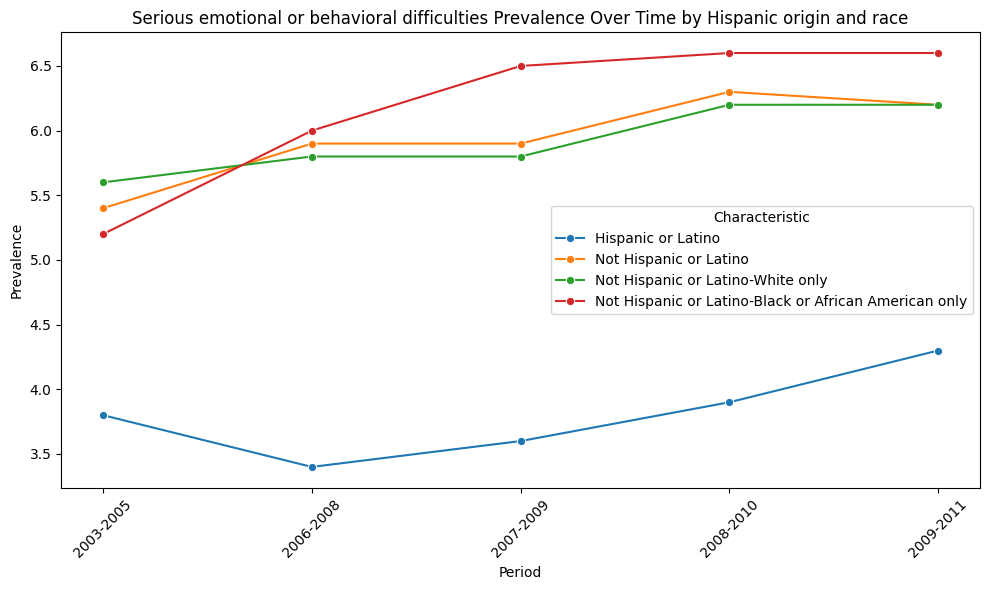

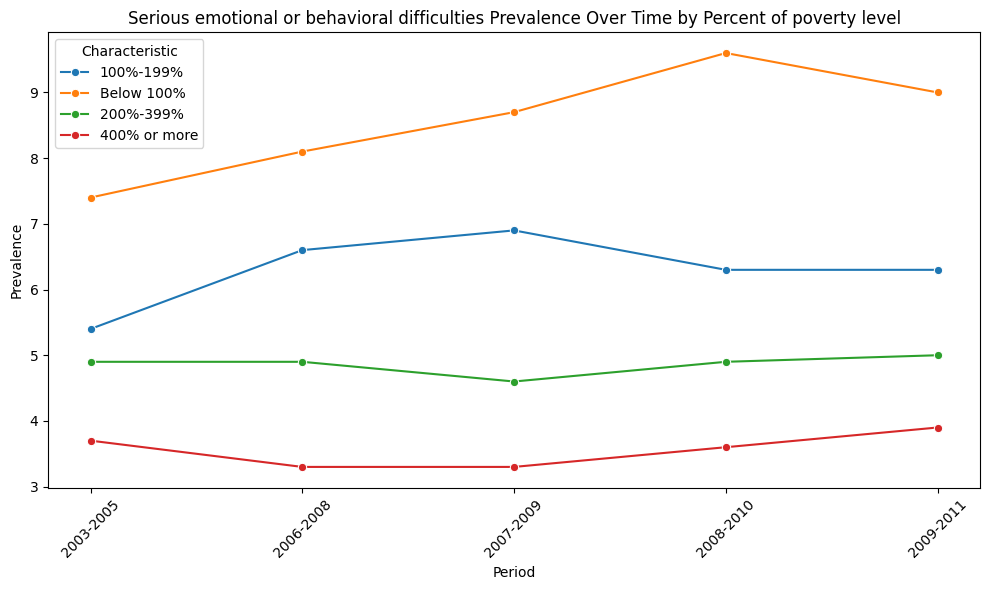

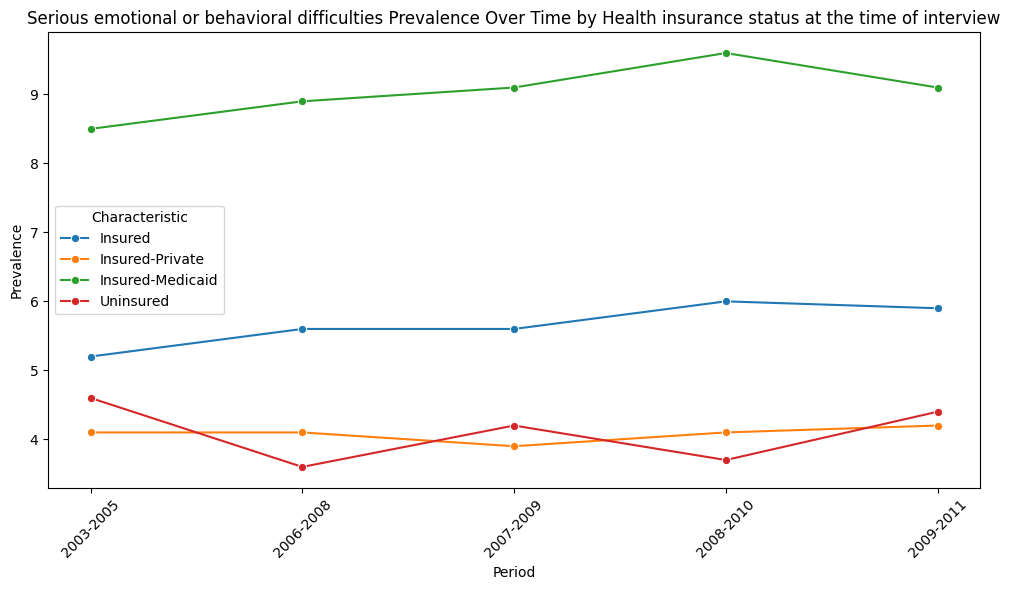

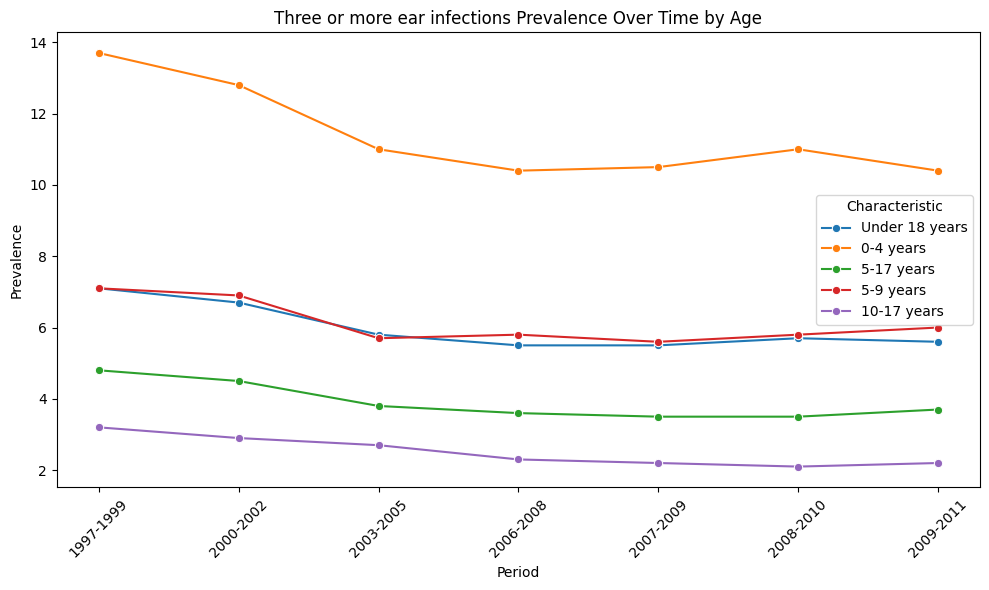

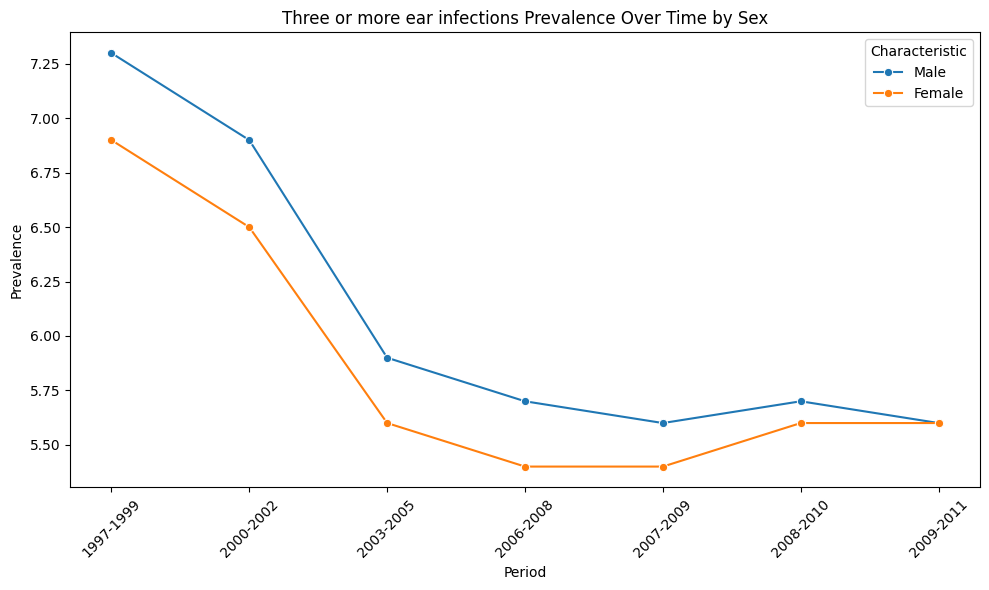

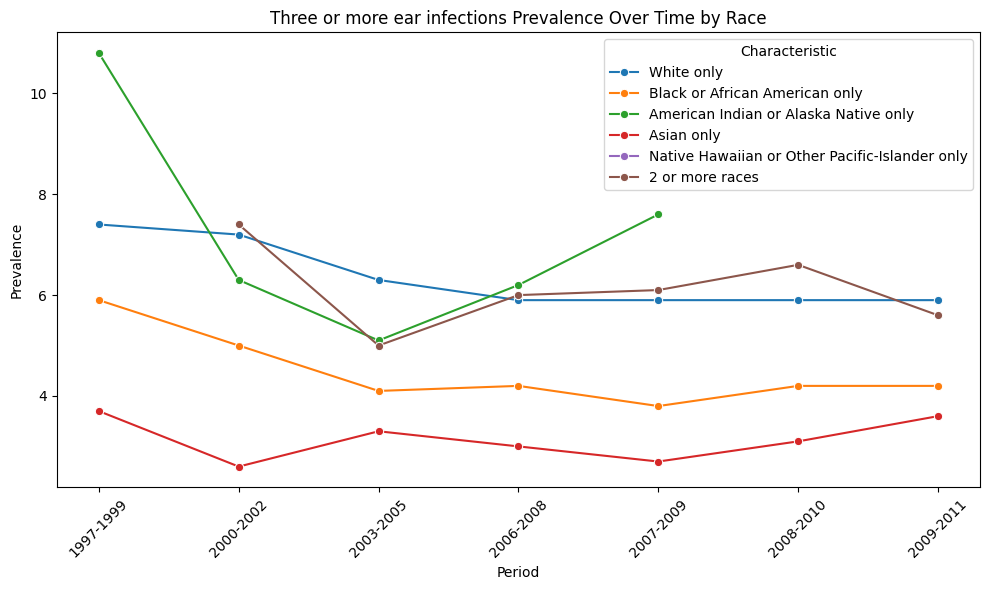

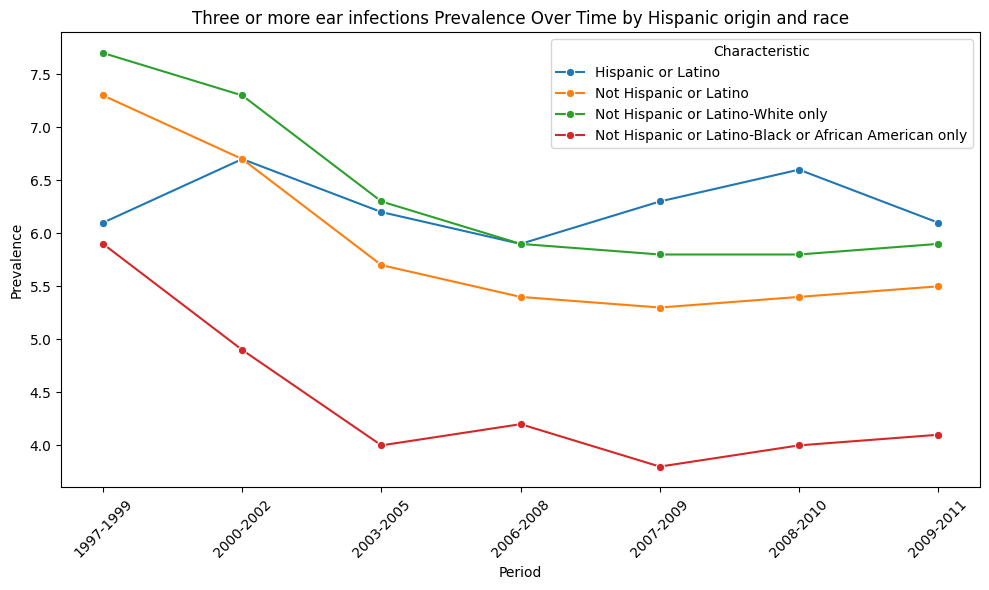

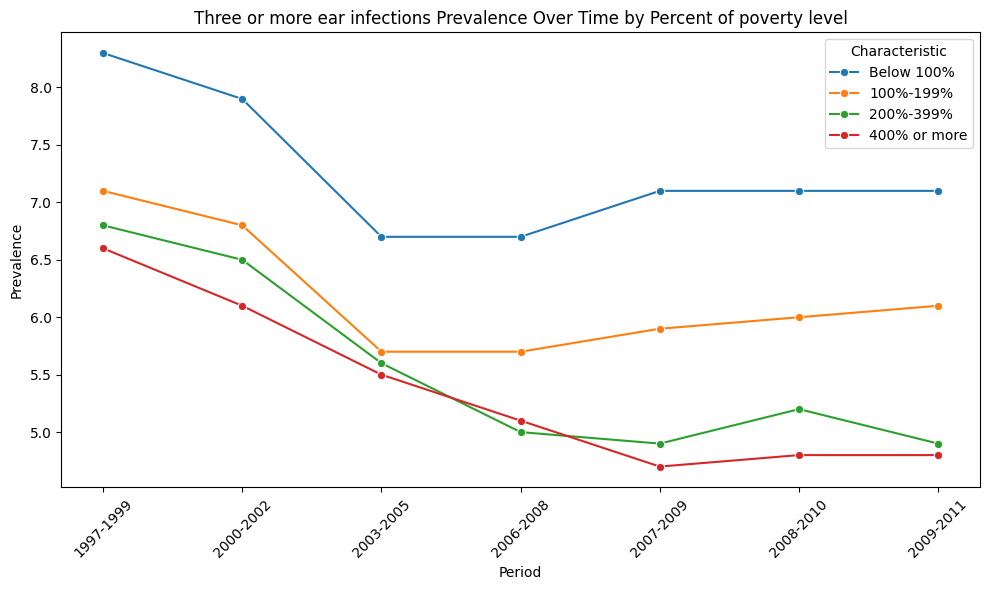

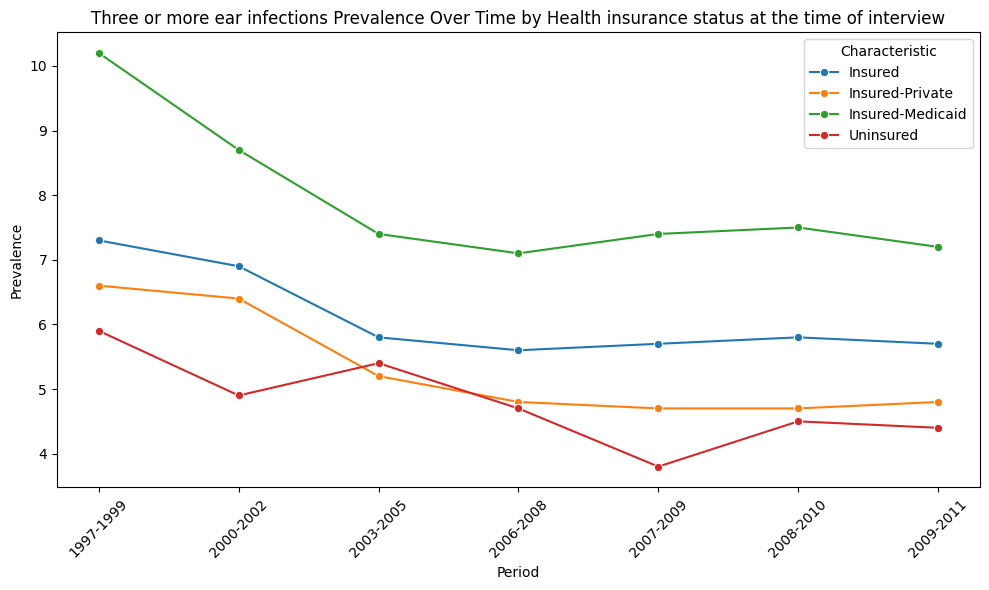

In [57]:
for condition in conditions:
  for question in questions:
    plot_prevalence_over_time(condition=condition, question=question, df_long=df_long)

## Drawing Conclusions

To get started, let's answer the question: Which demographic group has seen the biggest rise in asthma prevalence over time?

In [69]:
# First, let's identify which age group has seen the largest rise in asthma prevalence from 1997–1999 to 2009–2011.

asthma_age = df_long[(df_long['Group'] == 'Current asthma') & (df_long['Question'] == 'Age')]
asthma_age

Group  Characteristic Question     Period  Prevalence
0     Current asthma  Under 18 years      Age  1997-1999         NaN
1     Current asthma       0-4 years      Age  1997-1999         NaN
2     Current asthma      5-17 years      Age  1997-1999         NaN
3     Current asthma       5-9 years      Age  1997-1999         NaN
4     Current asthma     10-17 years      Age  1997-1999         NaN
196   Current asthma  Under 18 years      Age  2000-2002         NaN
197   Current asthma       0-4 years      Age  2000-2002         NaN
198   Current asthma      5-17 years      Age  2000-2002         NaN
199   Current asthma       5-9 years      Age  2000-2002         NaN
200   Current asthma     10-17 years      Age  2000-2002         NaN
392   Current asthma  Under 18 years      Age  2003-2005         8.7
393   Current asthma       0-4 years      Age  2003-2005         6.1
394   Current asthma      5-17 years      Age  2003-2005         9.6
395   Current asthma       5-9 years      Age  2003-2005         9.1
396   Current asthma     10-17 years      Age  2003-2005         9.9
588   Current asthma  Under 18 years      Age  2006-2008         9.3
589   Current asthma       0-4 years      Age  2006-2008         6.2
590   Current asthma      5-17 years      Age  2006-2008        10.5
591   Current asthma       5-9 years      Age  2006-2008        10.6
592   Current asthma     10-17 years      Age  2006-2008        10.4
784   Current asthma  Under 18 years      Age  2007-2009         9.4
785   Current asthma       0-4 years      Age  2007-2009         6.4
786   Current asthma      5-17 years      Age  2007-2009        10.6
787   Current asthma       5-9 years      Age  2007-2009        10.2
788   Current asthma     10-17 years      Age  2007-2009        10.8
980   Current asthma  Under 18 years      Age  2008-2010         9.5
981   Current asthma       0-4 years      Age  2008-2010         6.2
982   Current asthma      5-17 years      Age  2008-2010        10.8
983   Current asthma       5-9 years      Age  2008-2010        10.7
984   Current asthma     10-17 years      Age  2008-2010        10.9
1176  Current asthma  Under 18 years      Age  2009-2011         9.5
1177  Current asthma       0-4 years      Age  2009-2011         6.4
1178  Current asthma      5-17 years      Age  2009-2011        10.7
1179  Current asthma       5-9 years      Age  2009-2011        10.2
1180  Current asthma     10-17 years      Age  2009-2011        11.1

In [82]:
# Let's go over each age group and see how its prevalance over time changes.
asthma_age = asthma_age.dropna(subset=['Prevalence'])
age_groups = asthma_age['Characteristic'].unique()
age_groups

array(['Under 18 years', '0-4 years', '5-17 years', '5-9 years',
       '10-17 years'], dtype=object)

[8.7] [9.5]
[6.1] [6.4]
[9.6] [10.7]
[9.1] [10.2]
[9.9] [11.1]
[{'Age Group': 'Under 18 years', 'Change in Prevalence': np.float64(0.8000000000000007)}, {'Age Group': '0-4 years', 'Change in Prevalence': np.float64(0.3000000000000007)}, {'Age Group': '5-17 years', 'Change in Prevalence': np.float64(1.0999999999999996)}, {'Age Group': '5-9 years', 'Change in Prevalence': np.float64(1.0999999999999996)}, {'Age Group': '10-17 years', 'Change in Prevalence': np.float64(1.1999999999999993)}]
        Age Group  Change in Prevalence
4     10-17 years                   1.2
3       5-9 years                   1.1
2      5-17 years                   1.1
0  Under 18 years                   0.8
1       0-4 years                   0.3


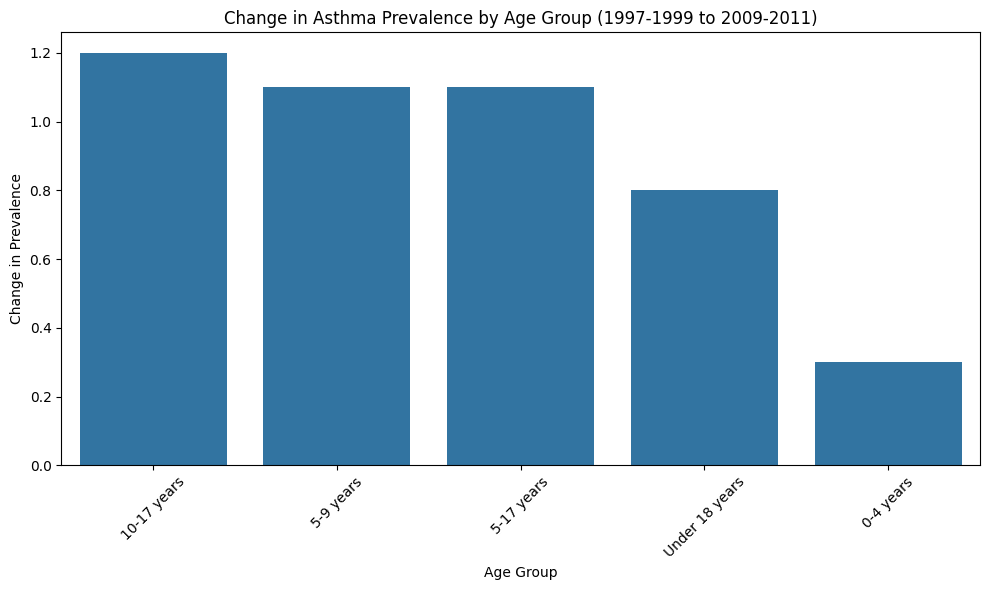

In [86]:
changes = []

for age_group in age_groups:
    group_data = asthma_age[asthma_age['Characteristic'] == age_group]

    # Extract prevalence for the start and end period
    start_val = group_data[group_data['Period'] == '2003-2005']['Prevalence'].values
    end_val = group_data[group_data['Period'] == '2009-2011']['Prevalence'].values

    print(start_val, end_val)

    # Make sure we have valid data (i.e., not empty or NaN)
    if len(start_val) > 0 and len(end_val) > 0:
        if not pd.isna(start_val[0]) and not pd.isna(end_val[0]):
            change = end_val[0] - start_val[0]
            changes.append({'Age Group': age_group, 'Change in Prevalence': change})

print(changes)

# Step 3: Create DataFrame and sort
change_df = pd.DataFrame(changes)
change_df = change_df.sort_values(by='Change in Prevalence', ascending=False)
print(change_df)

# Optional: Visualize the change
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=change_df, x='Age Group', y='Change in Prevalence')
plt.xticks(rotation=45)
plt.title('Change in Asthma Prevalence by Age Group (1997-1999 to 2009-2011)')
plt.tight_layout()
plt.show()

In [88]:
print(changes)

[{'Age Group': 'Under 18 years', 'Change in Prevalence': np.float64(0.8000000000000007)}, {'Age Group': '0-4 years', 'Change in Prevalence': np.float64(0.3000000000000007)}, {'Age Group': '5-17 years', 'Change in Prevalence': np.float64(1.0999999999999996)}, {'Age Group': '5-9 years', 'Change in Prevalence': np.float64(1.0999999999999996)}, {'Age Group': '10-17 years', 'Change in Prevalence': np.float64(1.1999999999999993)}]


In [89]:
from scipy.stats import ttest_ind
import numpy as np

# Step 1: Filter for Under 18 years
asthma_under18 = df_long[
    (df_long['Group'] == 'Current asthma') &
    (df_long['Question'] == 'Age') &
    (df_long['Characteristic'] == 'Under 18 years') &
    (df_long['Period'].isin(['2003-2005', '2009-2011']))
]

print(asthma_under18)

               Group  Characteristic Question     Period  Prevalence
392   Current asthma  Under 18 years      Age  2003-2005         8.7
1176  Current asthma  Under 18 years      Age  2009-2011         9.5


In [90]:
# Get prevalence values for each time period
start_val = asthma_under18[asthma_under18['Period'] == '2003-2005']['Prevalence'].values
end_val = asthma_under18[asthma_under18['Period'] == '2009-2011']['Prevalence'].values

print("2003-2005:", start_val)
print("2009-2011:", end_val)

2003-2005: [8.7]
2009-2011: [9.5]


## Linear Regression

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Filter for 'Under 18 years'
asthma_under18 = df_long[
    (df_long['Group'] == 'Current asthma') &
    (df_long['Question'] == 'Age') &
    (df_long['Characteristic'] == 'Under 18 years')
]

In [93]:
# Convert 'Period' to numeric midpoints
asthma_under18['Period_mid'] = asthma_under18['Period'].str.extract(r'(\d{4})-(\d{4})').astype(int).mean(axis=1)

<ipython-input-93-37b0dffba632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_under18['Period_mid'] = asthma_under18['Period'].str.extract(r'(\d{4})-(\d{4})').astype(int).mean(axis=1)


In [94]:
# Drop NaN values (if any)
asthma_under18 = asthma_under18.dropna(subset=['Prevalence'])

# Prepare data for regression
X = asthma_under18[['Period_mid']]
y = asthma_under18['Prevalence']

# Fit linear model
model = LinearRegression()
model.fit(X, y)

# Predict for line
asthma_under18['Trend'] = model.predict(X)

<ipython-input-94-045dbab0d5e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_under18['Trend'] = model.predict(X)


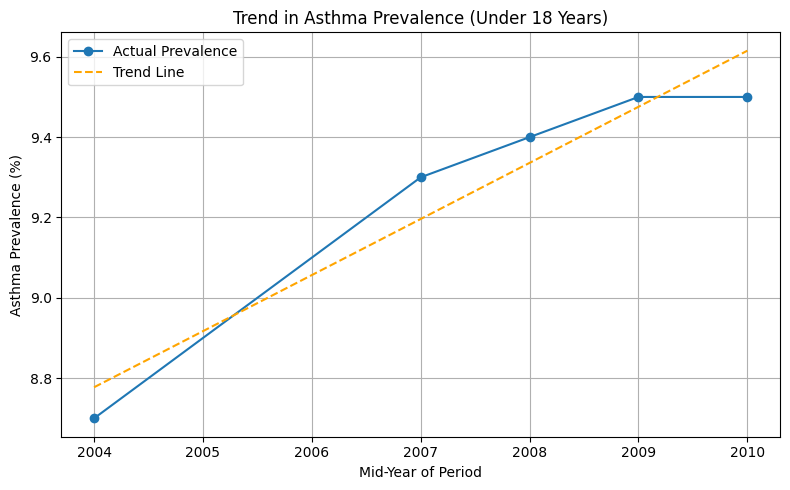

In [95]:
plt.figure(figsize=(8, 5))
plt.plot(asthma_under18['Period_mid'], asthma_under18['Prevalence'], marker='o', label='Actual Prevalence')
plt.plot(asthma_under18['Period_mid'], asthma_under18['Trend'], linestyle='--', label='Trend Line', color='orange')
plt.xlabel('Mid-Year of Period')
plt.ylabel('Asthma Prevalence (%)')
plt.title('Trend in Asthma Prevalence (Under 18 Years)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()